In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


In [2]:
df = pd.read_csv("C:\src\Project\Final_Project\marketing_campaign.csv",sep="\t")
df.shape

(2240, 29)

In [3]:
pd. set_option('display.max_columns', None)

In [4]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  04-09-2012       58       635         88              546              172   
1  08-03-2014       38        11          1                6                2   
2  21-08-2013       26       426         49              127              111   
3  10-02-2014       26        11          4               20               10   
4  19-01-2014       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [7]:
df = df.dropna()

Dates are in Object format

In [8]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"],format='mixed')
df["Dt_Customer"]

0      2012-04-09
1      2014-08-03
2      2013-08-21
3      2014-10-02
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-10-06
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2216, dtype: datetime64[ns]

Finding Newest and Oldest Customer

In [9]:
new_customer = df["Dt_Customer"].max().date()
old_customer = df["Dt_Customer"].min().date()
print("New Customer:",new_customer)
print("Old Customer:",old_customer)


New Customer: 2014-12-06
Old Customer: 2012-01-08


In [10]:
days = []
for i in df["Dt_Customer"]:
    days.append(new_customer-i.date())
df["Customer_Dur"] = days
df["Customer_Dur"] = pd.to_numeric(df["Customer_Dur"], errors='coerce')
df["Customer_Dur"].dtype

dtype('int64')

In [11]:
Marital_Status=df["Marital_Status"].unique()
Education = df["Education"].unique()
print(Marital_Status)
print(Education)

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [12]:
Marital_Status_count_dict = {}
Education_count_dict = {}
for i in Marital_Status:
    Marital_Status_count_dict[i] = df["Marital_Status"][df["Marital_Status"] == i].count()
for i in Education:
    Education_count_dict[i] = df["Education"][df["Education"]==i].count()
print(Marital_Status_count_dict)
print(Education_count_dict)

{'Single': 471, 'Together': 573, 'Married': 857, 'Divorced': 232, 'Widow': 76, 'Alone': 3, 'Absurd': 2, 'YOLO': 2}
{'Graduation': 1116, 'PhD': 481, 'Master': 365, 'Basic': 54, '2n Cycle': 200}


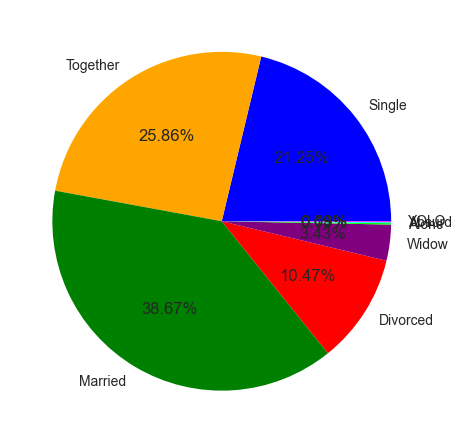

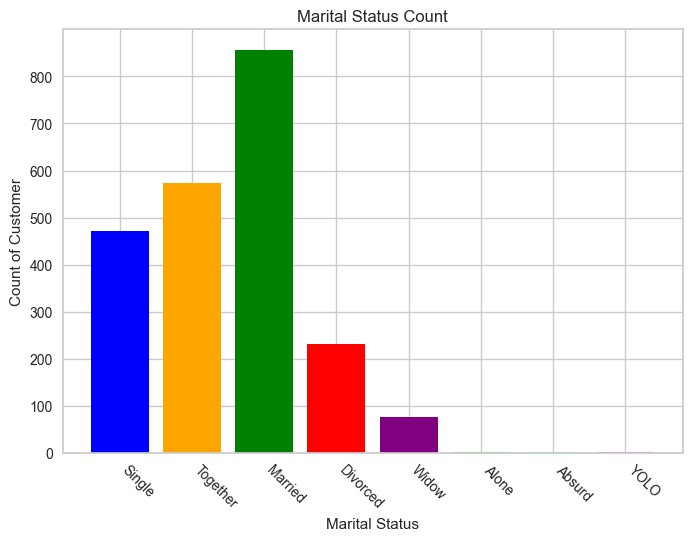

In [13]:
sizes_marital = Marital_Status_count_dict.values()
labels_marital = Marital_Status_count_dict.keys()
MyColors = ['blue','orange','green','red', 'purple', 'lime', 'cyan','magenta']
plt.pie(sizes_marital,labels=labels_marital,autopct="%1.2f%%",colors=MyColors)
plt.show()
plt.bar(labels_marital,sizes_marital,color=MyColors)
plt.xlabel("Marital Status")
plt.ylabel("Count of Customer")
plt.title("Marital Status Count")
plt.xticks(rotation=-45,ha="left")
# plt.grid(axis="y",linestyle="--")
plt.show()
    

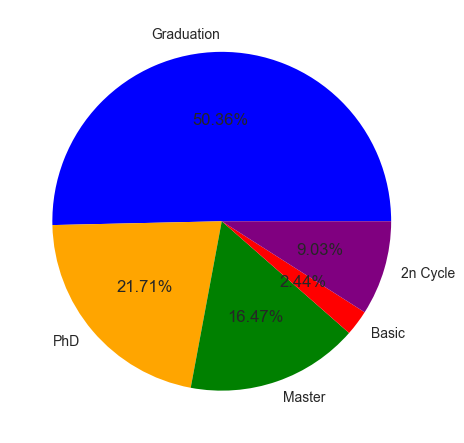

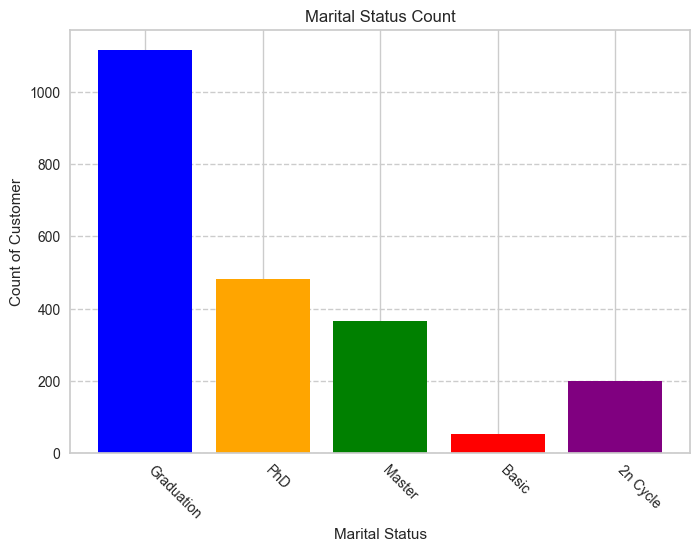

In [14]:
sizes_education = Education_count_dict.values()
labels_education = Education_count_dict.keys()
MyColors = ['blue','orange','green','red', 'purple', 'lime', 'cyan','magenta']
plt.pie(sizes_education,labels=labels_education,autopct="%1.2f%%",colors=MyColors)
plt.show()
plt.bar(labels_education,sizes_education,color=MyColors)
plt.grid(axis="y",linestyle="--")
plt.xlabel("Marital Status")
plt.ylabel("Count of Customer")
plt.title("Marital Status Count")
plt.xticks(rotation=-45,ha="left")
plt.show()

In [15]:
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
Product_Count = {"Wines":df["Wines"].sum(),
                 "Fruits":df["Fruits"].sum(),
                 "Meat":df["Meat"].sum(),
                 "FishProducts":df["Fish"].sum(),
                 "Sweet":df["Sweets"].sum(),
                 "Gold":df["Gold"].sum()
                 }
Product_Count

{'Wines': 676083,
 'Fruits': 58405,
 'Meat': 370063,
 'FishProducts': 83405,
 'Sweet': 59896,
 'Gold': 97427}

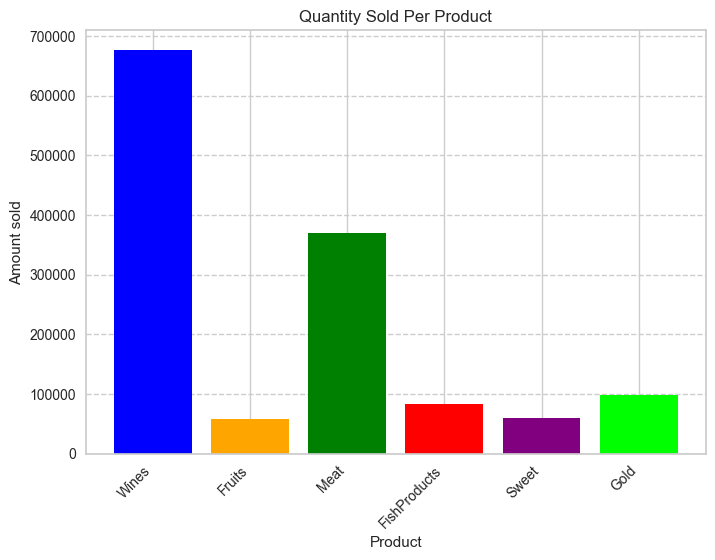

In [16]:
sizes_Product_count = Product_Count.values()
labels_Product_count = Product_Count.keys()
plt.grid(axis="y",linestyle="--")
plt.bar(labels_Product_count,sizes_Product_count,color = MyColors)
plt.xlabel("Product")
plt.ylabel("Amount sold")
plt.title("Quantity Sold Per Product")
plt.xticks(rotation=45,ha="right")
plt.show()

In [17]:
df["Age"] = 2024-df["Year_Birth"]
df["Spent"] = df["Fruits"]+df["Fish"]+df["Meat"]+df["Sweets"]+df["Gold"]+df["Wines"]
df["Living_Status"] = df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone"})
df["Children_Count"] = df["Kidhome"] + df["Teenhome"]
df["Family_Member_Count"] = df["Living_Status"].replace({"Alone":1,"Partner":2}) + df["Children_Count"]
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})
df["Is_Parent"] = np.where(df.Children_Count> 0, 1, 0)

to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)


In [18]:
df.describe()

Income      Kidhome     Teenhome      Recency        Wines  \
count    2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean    52247.251354     0.441787     0.505415    49.012635   305.091606   
std     25173.076661     0.536896     0.544181    28.948352   337.327920   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35303.000000     0.000000     0.000000    24.000000    24.000000   
50%     51381.500000     0.000000     0.000000    49.000000   174.500000   
75%     68522.000000     1.000000     1.000000    74.000000   505.000000   
max    666666.000000     2.000000     2.000000    99.000000  1493.000000   

            Fruits         Meat         Fish       Sweets         Gold  \
count  2216.000000  2216.000000  2216.000000  2216.000000  2216.000000   
mean     26.356047   166.995939    37.637635    27.028881    43.965253   
std      39.793917   224.283273    54.752082    41.072046    51.815414   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       2.000000    16.000000     3.000000     1.000000     9.000000   
50%       8.000000    68.000000    12.000000     8.000000    24.500000   
75%      33.000000   232.250000    50.000000    33.000000    56.000000   
max     199.000000  1725.000000   259.000000   262.000000   321.000000   

       NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
count        2216.000000      2216.000000          2216.000000   
mean            2.323556         4.085289             2.671029   
std             1.923716         2.740951             2.926734   
min             0.000000         0.000000             0.000000   
25%             1.000000         2.000000             0.000000   
50%             2.000000         4.000000             2.000000   
75%             3.000000         6.000000             4.000000   
max            15.000000        27.000000            28.000000   

       NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count        2216.000000        2216.000000   2216.000000   2216.000000   
mean            5.800993           5.319043      0.073556      0.074007   
std             3.250785           2.425359      0.261106      0.261842   
min             0.000000           0.000000      0.000000      0.000000   
25%             3.000000           3.000000      0.000000      0.000000   
50%             5.000000           6.000000      0.000000      0.000000   
75%             8.000000           7.000000      0.000000      0.000000   
max            13.000000          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain     Response  \
count   2216.000000   2216.000000   2216.000000  2216.000000  2216.000000   
mean       0.073105      0.064079      0.013538     0.009477     0.150271   
std        0.260367      0.244950      0.115588     0.096907     0.357417   
min        0.000000      0.000000      0.000000     0.000000     0.000000   
25%        0.000000      0.000000      0.000000     0.000000     0.000000   
50%        0.000000      0.000000      0.000000     0.000000     0.000000   
75%        0.000000      0.000000      0.000000     0.000000     0.000000   
max        1.000000      1.000000      1.000000     1.000000     1.000000   

       Customer_Dur          Age        Spent  Children_Count  \
count  2.216000e+03  2216.000000  2216.000000     2216.000000   
mean   4.423735e+16    55.179603   607.075361        0.947202   
std    2.008532e+16    11.985554   602.900476        0.749062   
min    0.000000e+00    28.000000     5.000000        0.000000   
25%    2.937600e+16    47.000000    69.000000        0.000000   
50%    4.432320e+16    54.000000   396.500000        1.000000   
75%    5.927040e+16    65.000000  1048.000000        1.000000   
max    9.184320e+16   131.000000  2525.000000        3.000000   

       Family_Member_Count    Is_Parent  
count          2216.000000  2216.000000  
mean              2.592509 

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


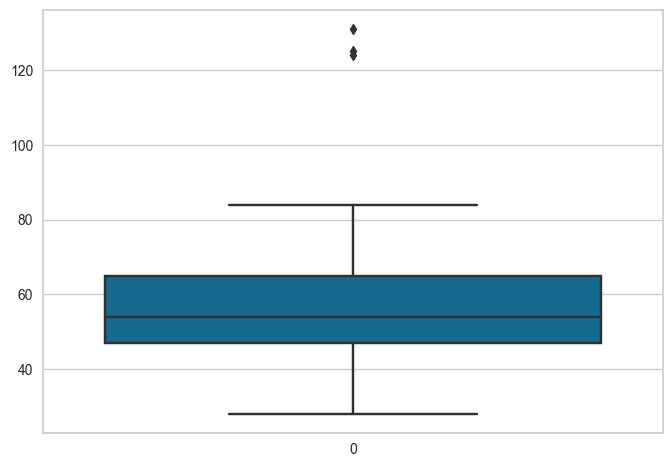

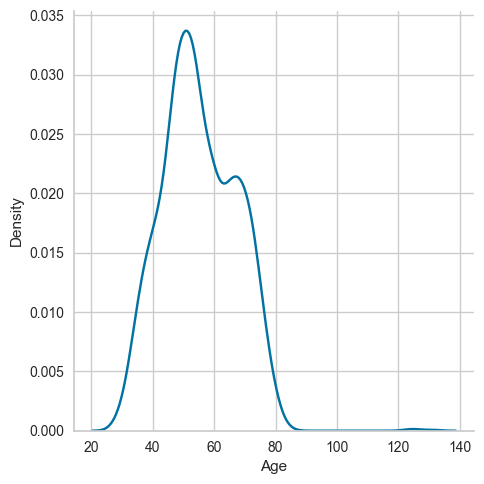

In [19]:
sns.boxplot(data= df["Age"])
sns.displot(data=df["Age"],kind="kde")

Outlier in Income for salary above 600000

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


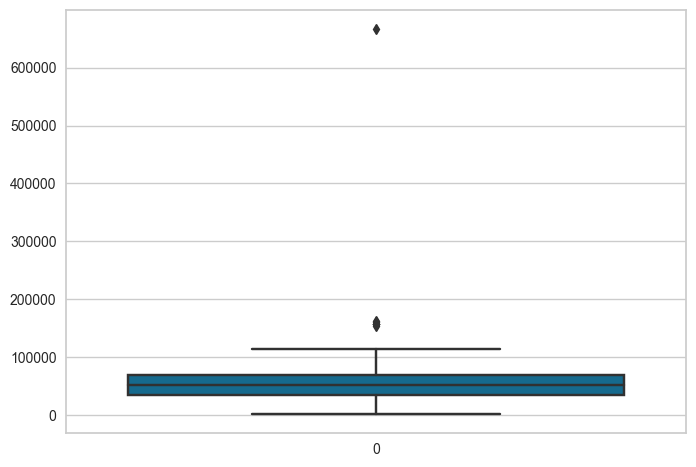

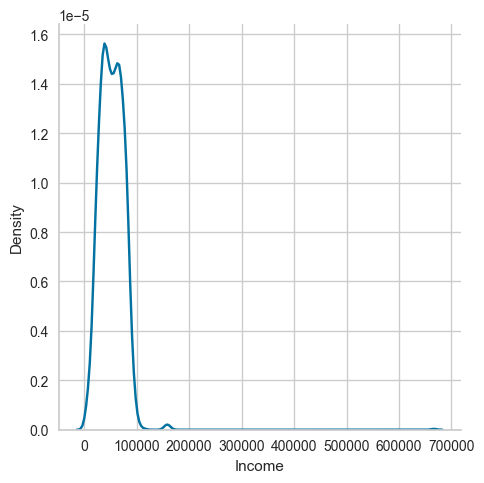

In [20]:
sns.boxplot(data=df["Income"])
sns.displot(data=df["Income"],kind="kde")

Relative Plot Of Some Selected Features: A Data Subset


C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x550 with 0 Axes>

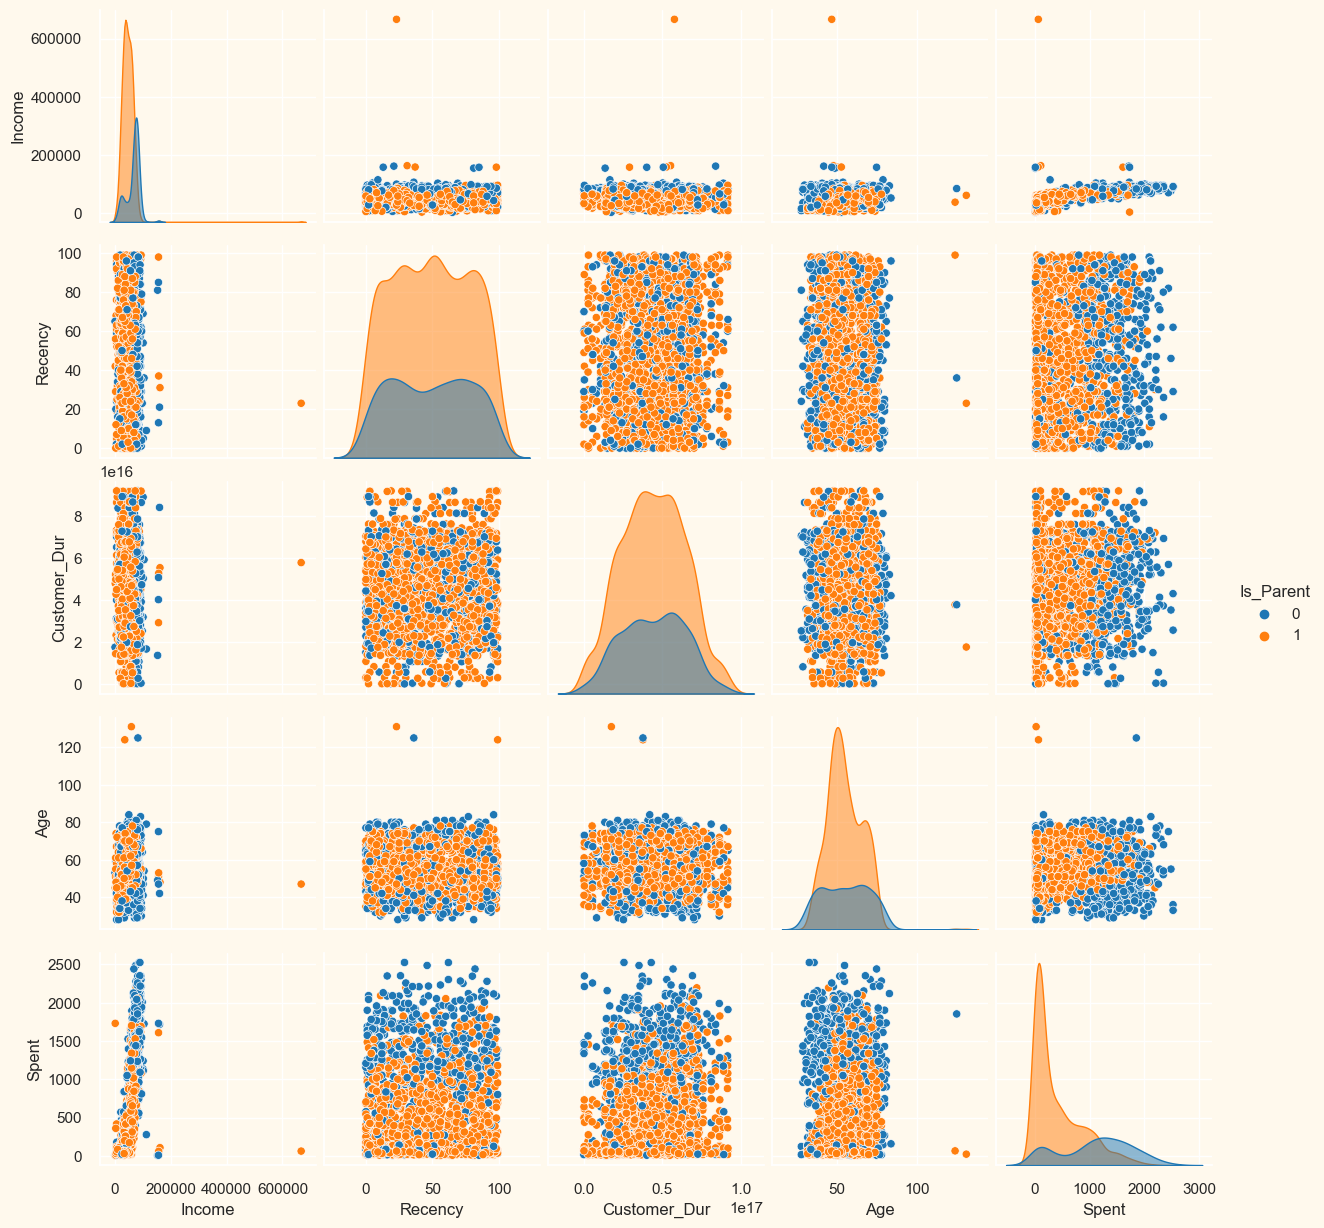

In [21]:
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
sns.set_palette("deep")
# Plotting following features
To_Plot = [ "Income", "Recency", "Customer_Dur", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A Data Subset")
plt.figure()
sns.pairplot(df[To_Plot], hue="Is_Parent", diag_kind='kde', diag_kws={'alpha': 0.5},palette= (["#1f77b4","#ff7f0e"]))
plt.show()

In [22]:
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("Total Data Points",len(df))

Total Data Points 2212


Correlated Heat map of all non categorical datas

<Axes: >

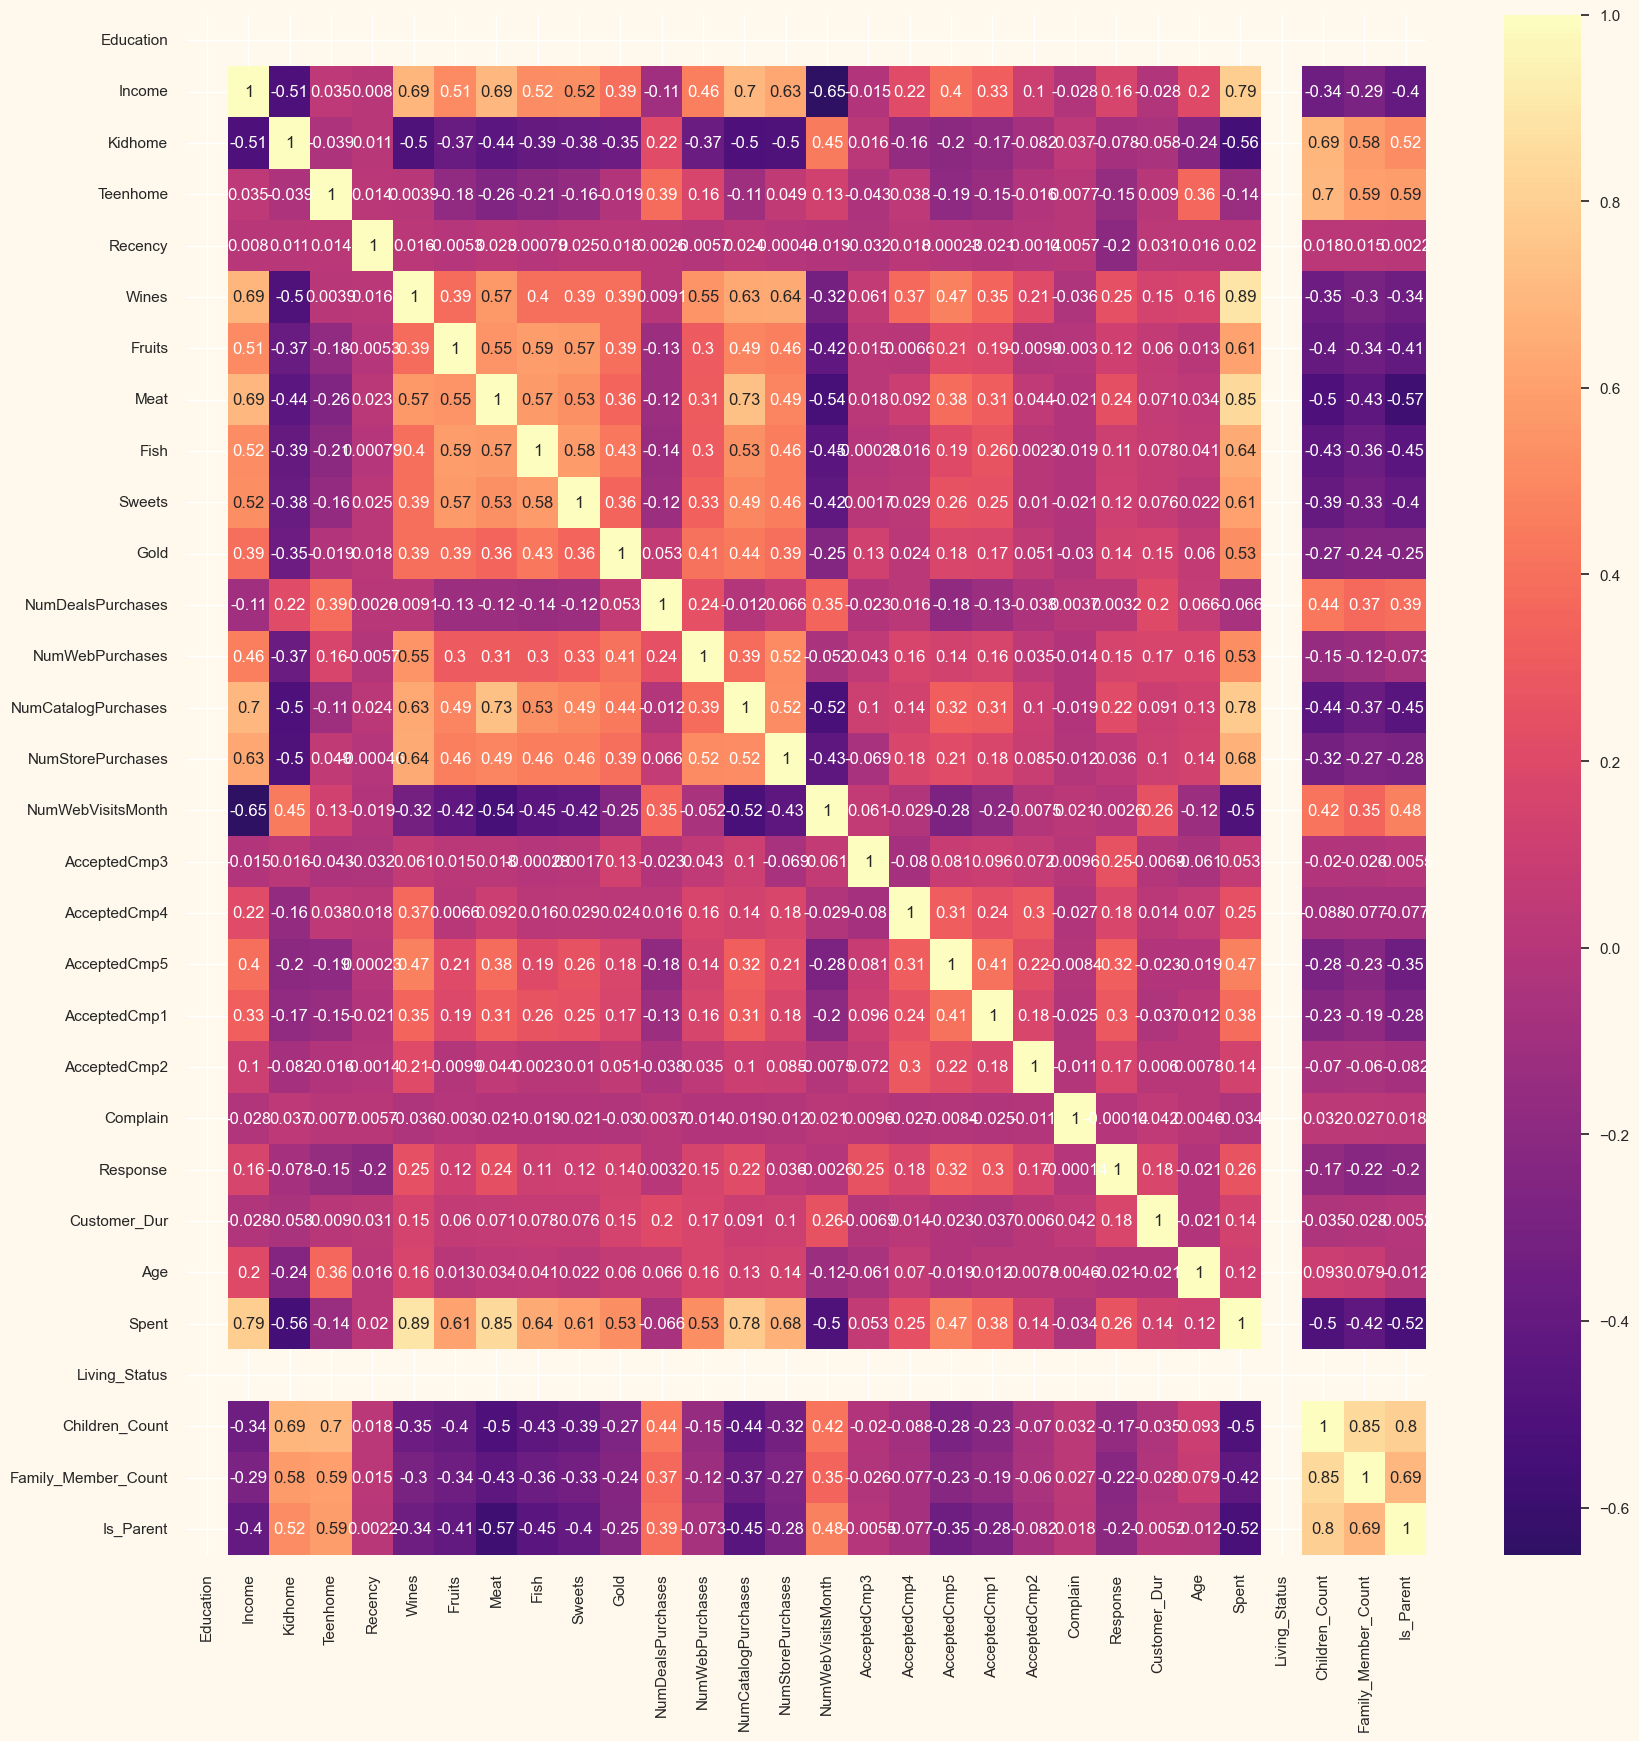

In [23]:
df_numeric = df.apply(pd.to_numeric, errors='coerce')
corrmat = df_numeric.corr()
plt.figure(figsize=(20, 20))  
sns.heatmap(corrmat, annot=True, cmap="magma", center=0)


## Data Preprocessing

In [24]:
#Finding columns with object datatype
s = (df.dtypes == "object")

#Extract the column names where the data type is 'object' and store them in a list
obj_cols = list(s[s].index)
print("This are categorical features:",obj_cols)

This are categorical features: ['Education', 'Living_Status']


Label Encoding them

In [25]:
LE = LabelEncoder()
for i in obj_cols:
    df[i] = df[[i]].apply(LE.fit_transform)
    # print(df[[i]])

In [26]:
df

Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  Meat  \
0             0  58138.0        0         0       58    635      88   546   
1             0  46344.0        1         1       38     11       1     6   
2             0  71613.0        0         0       26    426      49   127   
3             0  26646.0        1         0       26     11       4    20   
4             1  58293.0        1         0       94    173      43   118   
...         ...      ...      ...       ...      ...    ...     ...   ...   
2235          0  61223.0        0         1       46    709      43   182   
2236          1  64014.0        2         1       56    406       0    30   
2237          0  56981.0        0         0       91    908      48   217   
2238          1  69245.0        0         1        8    428      30   214   
2239          1  52869.0        1         1       40     84       3    61   

      Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0      172      88    88                  3                8   
1        2       1     6                  2                1   
2      111      21    42                  1                8   
3       10       3     5                  2                2   
4       46      27    15                  5                5   
...    ...     ...   ...                ...              ...   
2235    42     118   247                  2                9   
2236     0       0     8                  7                8   
2237    32      12    24                  1                2   
2238    80      30    61                  2                6   
2239     2       1    21                  3                3   

      NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                      10                  4                  7             0   
1                       1                  2                  5             0   
2                       2                 10                  4             0   
3                       0                  4                  6             0   
4                       3                  6                  5             0   
...                   ...                ...                ...           ...   
2235                    3                  4                  5             0   
2236                    2                  5                  7             0   
2237                    3                 13                  6             0   
2238                    5                 10                  3             0   
2239                    1                  4                  7             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0                0             0             0             0         0   
1                0             0             0             0         0   
2                0             0             0             0         0   
3                0             0             0             0         0   
4                0             0             0             0         0   
...            ...           ...           ...           ...       ...   
2235             0             0             0             0         0   
2236             0             0             1             0         0   
2237             1             0             0             0         0   
2238             0             0             0             0         0   
2239             0             0             0             0         0   

      Response       Customer_Dur  Age  Spent  Living_Status  Children_Count  \
0            1  83894400000000000   67   1617              0               0   
1            0  10800000000000000   70     27              0               2   
2            0  40780800000000000   59    776              1               0   
3            0   5616000000000000   40     53              1               1   
4            0  27734400000000000   43    422     

In [91]:
ds = df.copy()
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
ds = ds.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns=ds.columns)


In [93]:
scaled_ds.head()

Education    Income   Kidhome  Teenhome   Recency     Wines    Fruits  \
0  -0.893586  0.287105 -0.822754 -0.929699  0.310353  0.977660  1.552041   
1  -0.893586 -0.260882  1.040021  0.908097 -0.380813 -0.872618 -0.637461   
2  -0.893586  0.913196 -0.822754 -0.929699 -0.795514  0.357935  0.570540   
3  -0.893586 -1.176114  1.040021 -0.929699 -0.795514 -0.872618 -0.561961   
4   0.571657  0.294307  1.040021 -0.929699  1.554453 -0.392257  0.419540   

       Meat      Fish    Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.690293  2.453472  1.483713  0.852576           0.351030         1.426865   
1 -0.718230 -0.651004 -0.634019 -0.733642          -0.168701        -1.126420   
2 -0.178542  1.339513 -0.147184 -0.037254          -0.688432         1.426865   
3 -0.655787 -0.504911 -0.585335 -0.752987          -0.168701        -0.761665   
4 -0.218684  0.152508 -0.001133 -0.559545           1.390492         0.332600   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_Dur  \
0             2.503607          -0.555814           0.692181      1.973583   
1            -0.571340          -1.171160          -0.132545     -1.665144   
2            -0.229679           1.290224          -0.544908     -0.172664   
3            -0.913000          -0.555814           0.279818     -1.923210   
4             0.111982           0.059532          -0.132545     -0.822130   

        Age     Spent  Living_Status  Children_Count  Family_Member_Count  \
0  1.018352  1.676245      -1.349603       -1.264598            -1.758359   
1  1.274785 -0.963297      -1.349603        1.404572             0.449070   
2  0.334530  0.280110       0.740959       -1.264598            -0.654644   
3 -1.289547 -0.920135       0.740959        0.069987             0.449070   
4 -1.033114 -0.307562       0.740959        0.069987             0.449070   

   Is_Parent  Spent_zscore  Total_Promos  
0  -1.581139      1.676245      -0.43916  
1   0.632456     -0.963297      -0.43916  
2  -1.581139      0.280110      -0.43916  
3   0.632456     -0.920135      -0.43916  
4   0.632456     -0.307562      -0.43916

In [95]:
# pca = PCA(n_components=6)
pca = PCA(n_components=3)
# pca = PCA(0.95)
# PCA_df = pd.DataFrame(pca.fit_transform(scaled_ds),columns=["p1","p2","p3","p4","p5","p6"])
# print(pca_x.shape)
PCA_df = pd.DataFrame(pca.fit_transform(scaled_ds),columns=["p1","p2","p3"])
pca.explained_variance_ratio_*100


array([37.26540963, 11.83628949,  5.98245884])

In [96]:
PCA_df

p1        p2        p3
0     5.151335 -0.262757  2.587332
1    -3.079414  0.036198 -1.886651
2     2.461073 -0.867511 -0.318900
3    -2.887692 -1.471861 -0.863915
4    -0.760216  0.213287  0.005972
...        ...       ...       ...
2207  2.542621  2.399226  0.452802
2208 -2.764389  4.179827 -1.437500
2209  2.964124 -1.860421  0.656740
2210  1.485357  1.612088 -1.692125
2211 -2.831710  1.713671 -0.289205

[2212 rows x 3 columns]

In [31]:
PCA_df.describe().T

count          mean       std       min       25%       50%       75%  \
p1  2212.0  3.854662e-17  2.878377 -5.969419 -2.538490 -0.780424  2.383293   
p2  2212.0  8.994212e-17  1.706839 -4.312357 -1.328523 -0.157045  1.242088   
p3  2212.0  5.781993e-17  1.221901 -3.512856 -0.823331 -0.031068  0.801713   

         max  
p1  7.444321  
p2  6.141749  
p3  6.591892

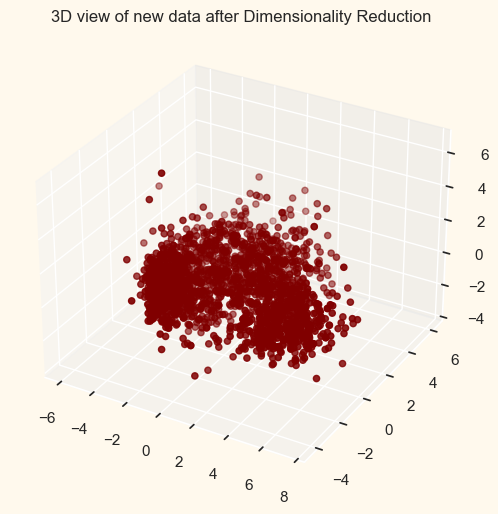

In [32]:
x = PCA_df["p1"]
y = PCA_df["p2"]
z = PCA_df["p3"]

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z,c="maroon")
ax.set_title("3D view of new data after Dimensionality Reduction")
plt.show()


## Clustering

Elbow Method to determine the number of clusters to be formed:


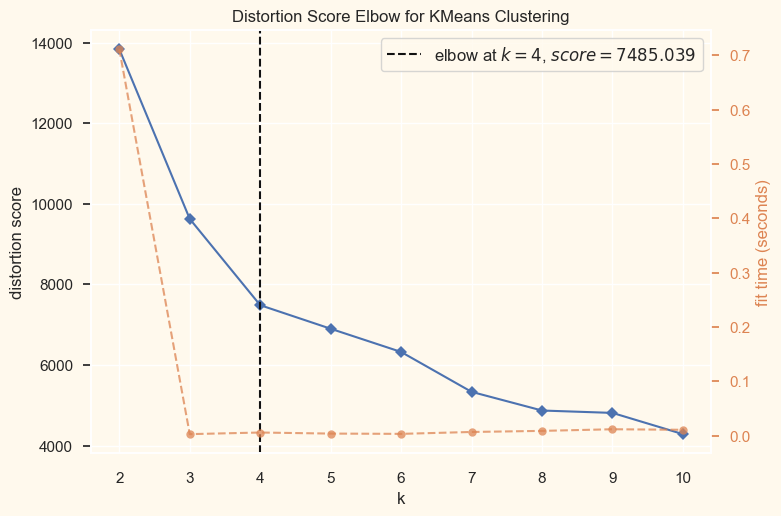

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [33]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

In [34]:
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_df)
PCA_df["Clusters"] = yhat_AC
#Adding the Clusters feature to the orignal dataframe.
# df["Clusters"]= yhat_AC

In [35]:
yhat_AC

array([1, 3, 1, ..., 2, 0, 0], dtype=int64)

In [36]:
df["Clusters"] = yhat_AC

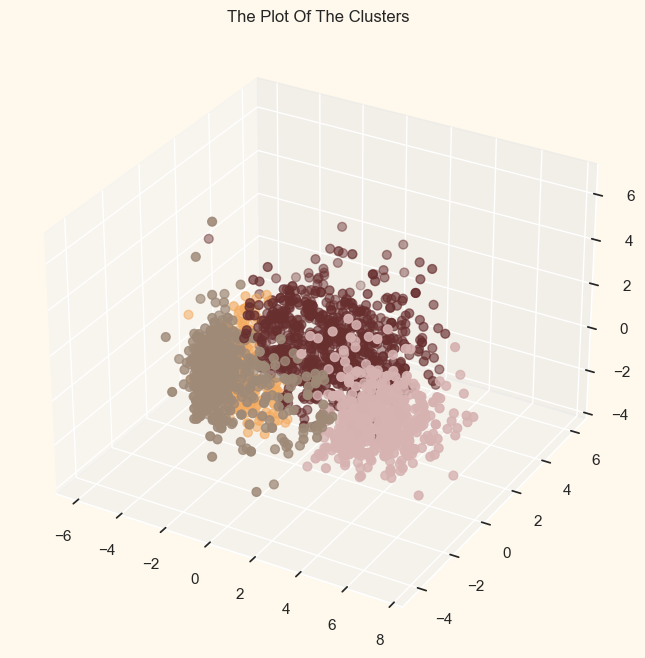

In [37]:
#Plotting the clusters
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_df["Clusters"], marker='o', cmap = cmap )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [38]:
yhat_AC

array([1, 3, 1, ..., 2, 0, 0], dtype=int64)

In [39]:
# df.to_csv("Clustered_Marketing_Campaign.csv")p-

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("Clustered_Marketing_Campaign.csv")

In [42]:
df.head()

Unnamed: 0  Education   Income  Kidhome  Teenhome  Recency  Wines  Fruits  \
0           0          0  58138.0        0         0       58    635      88   
1           1          0  46344.0        1         1       38     11       1   
2           2          0  71613.0        0         0       26    426      49   
3           3          0  26646.0        1         0       26     11       4   
4           4          1  58293.0        1         0       94    173      43   

   Meat  Fish  Sweets  Gold  NumDealsPurchases  NumWebPurchases  \
0   546   172      88    88                  3                8   
1     6     2       1     6                  2                1   
2   127   111      21    42                  1                8   
3    20    10       3     5                  2                2   
4   118    46      27    15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0             0             0             0             0         0         1   
1             0             0             0             0         0         0   
2             0             0             0             0         0         0   
3             0             0             0             0         0         0   
4             0             0             0             0         0         0   

        Customer_Dur  Age  Spent  Living_Status  Children_Count  \
0  83894400000000000   67   1617              0               0   
1  10800000000000000   70     27              0               2   
2  40780800000000000   59    776              1               0   
3   5616000000000000   40     53              1               1   
4  27734400000000000   43    422              1               1   

   Family_Member_Count  Is_Parent  Clusters  
0                    1          0         1  
1                    3          1         3  
2                    2          0         1  
3                    3          1         2  
4                    3          1         0

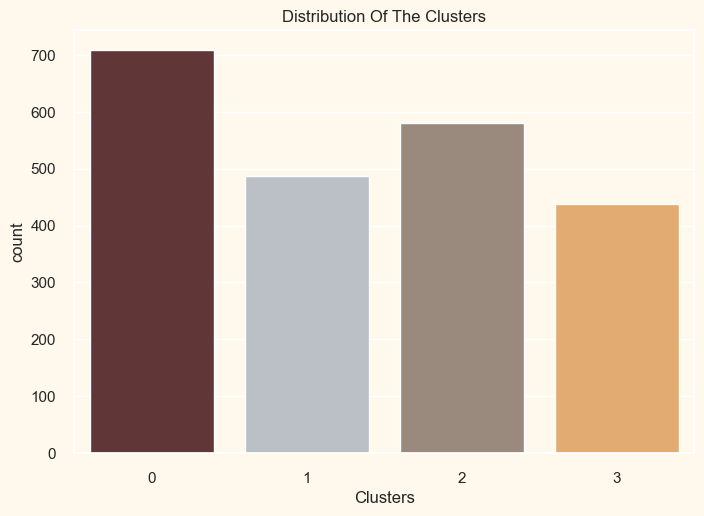

In [43]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

# Understanding the Income Range and Amount Spent in the dataset

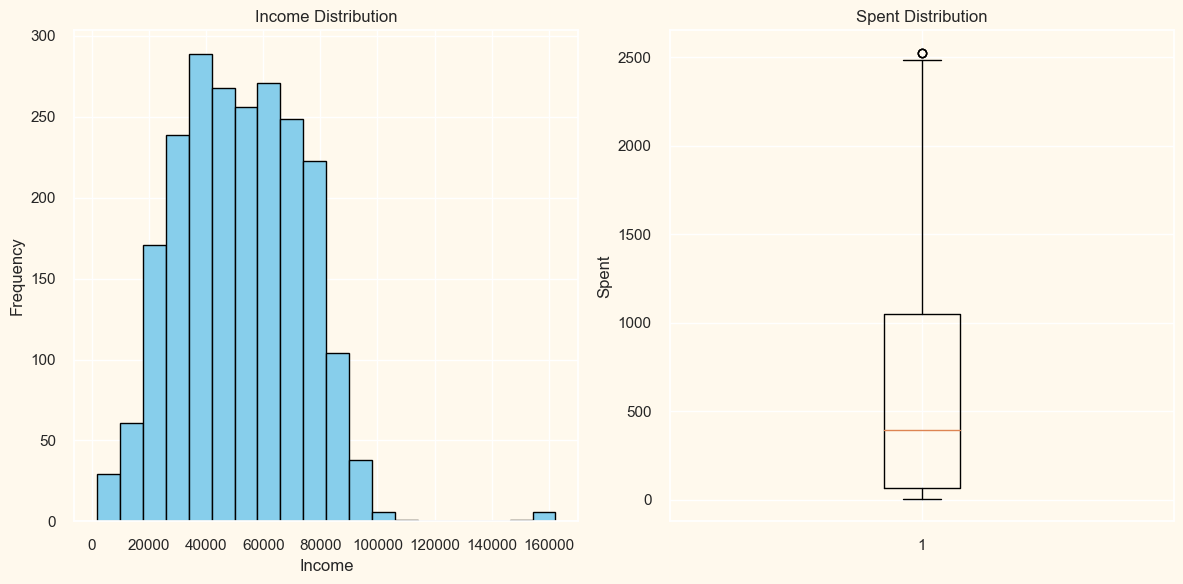

In [44]:
df['Spent_zscore'] = (df['Spent'] - df['Spent'].mean()) / df['Spent'].std()
outliers_threshold = 3
outliers = df[abs(df['Spent_zscore']) > outliers_threshold]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.boxplot(df['Spent'])
plt.title('Spent Distribution')
plt.ylabel('Spent')
plt.tight_layout()
plt.show()

# Income and Spent Distribution Distribution Insights:

The income distribution is skewed towards the lower end, with a significant concentration of data points in the 60,000 to 80,000 range. This suggests that a large portion of the population or sample earns within this income bracket.
The frequency of higher incomes decreases as the income value increases, indicating fewer people earn significantly higher incomes. This is typical of many real-world income distributions, reflecting economic inequality where the majority of the population earns a moderate income while a smaller fraction earns very high incomes.
Spent Distribution Insights:

The box plot for spending shows that the median spending is around the middle of the range, with a fairly symmetrical distribution of spending around the median. This suggests that the typical spending behavior does not vary dramatically from the median.
The presence of an outlier in the spending data indicates that there is at least one individual or data point with significantly higher spending compared to the rest. This could represent an anomaly or could be indicative of a segment of the population that engages in much higher levels of consumption.
Comparative Insights:

Comparing the two plots, it's evident that while income has a wide distribution and is skewed towards lower values, spending is more tightly clustered around the median. This could suggest that regardless of income variations, spending behaviors among the population or sample tend to be more uniform.
The analysis of both income and spending distributions can be crucial for understanding economic behaviors, planning marketing strategies, or for socio-economic research.

The clusters seem to be fairly distributed.

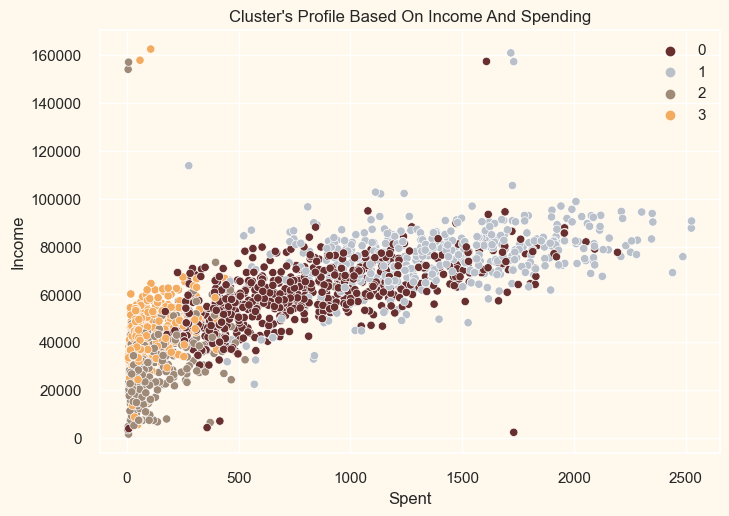

In [45]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: high spending & average income
* group 1: high spending & high income
* group 2: low spending & low income 
* group 3: high spending & low income  

Next, I will be looking at the detailed distribution of clusters as per the various products in the data. Namely: Wines, Fruits, Meat, Fish, Sweets and Gold

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 22.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 69.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 65.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:3544: UserWarning: 31.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Dell\AppData\Roaming\Py

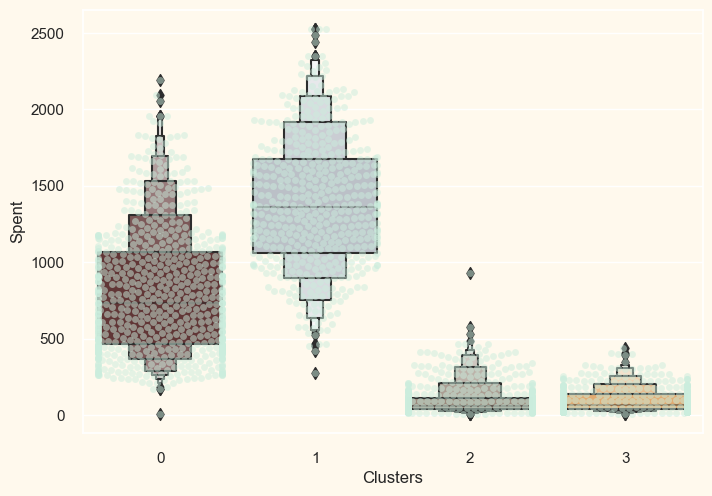

In [46]:
plt.figure()
pl=sns.swarmplot(x=df["Clusters"], y=df["Spent"], color= "#CBEDDD", alpha=0.5 )
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"], palette=pal)
plt.show()

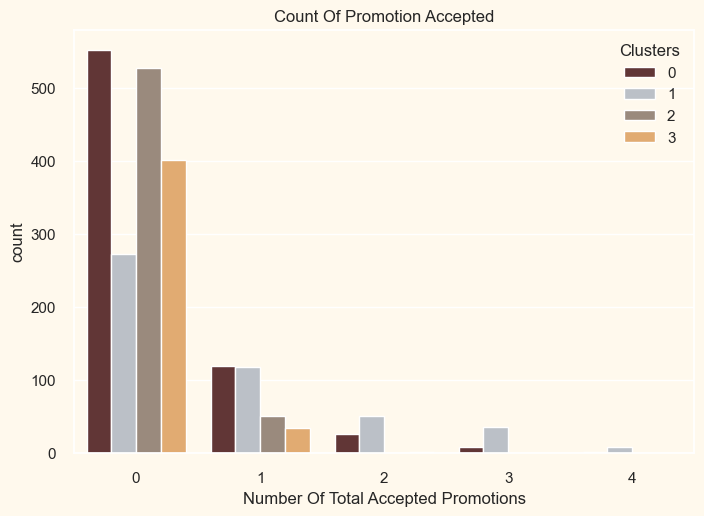

In [47]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]
#Plotting count of total campaign accepted.
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters"], palette= pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

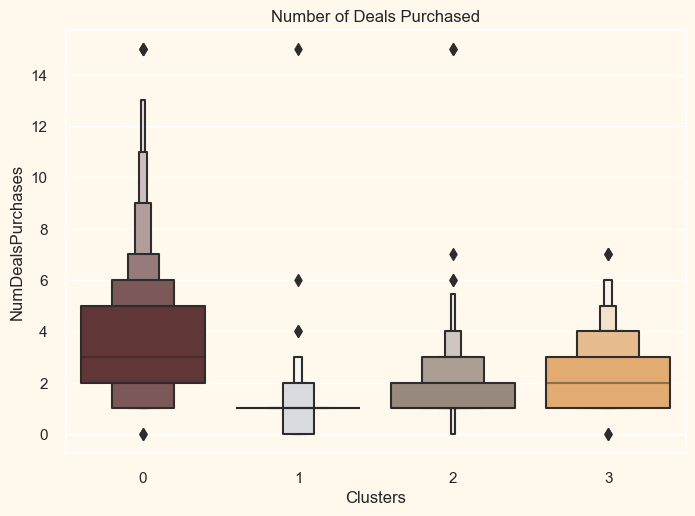

In [48]:
#Plotting the number of deals purchased
plt.figure()
pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"], palette= pal)
pl.set_title("Number of Deals Purchased")
plt.show()

<Figure size 800x550 with 0 Axes>

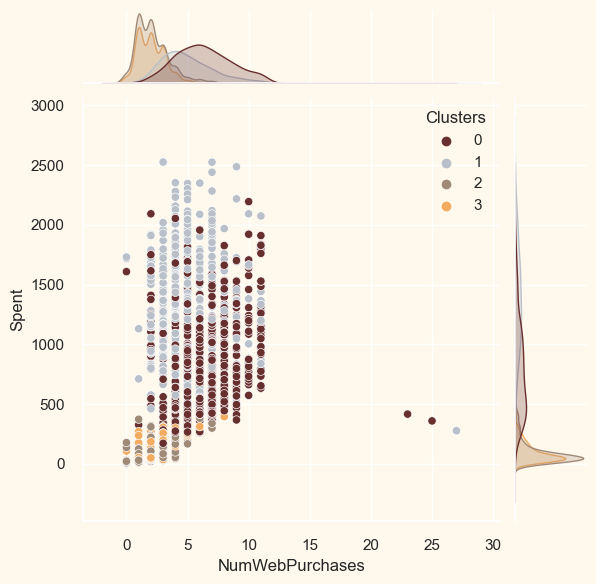

<Figure size 800x550 with 0 Axes>

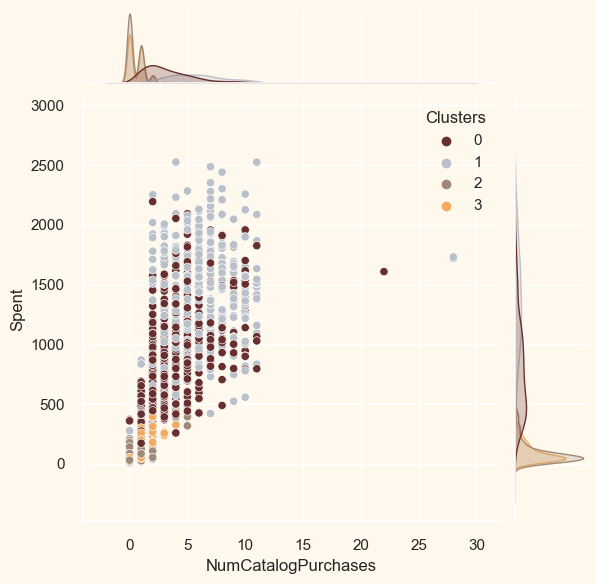

<Figure size 800x550 with 0 Axes>

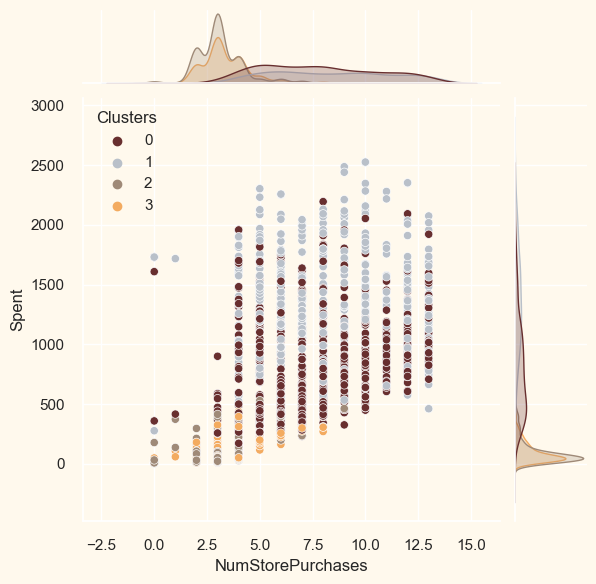

<Figure size 800x550 with 0 Axes>

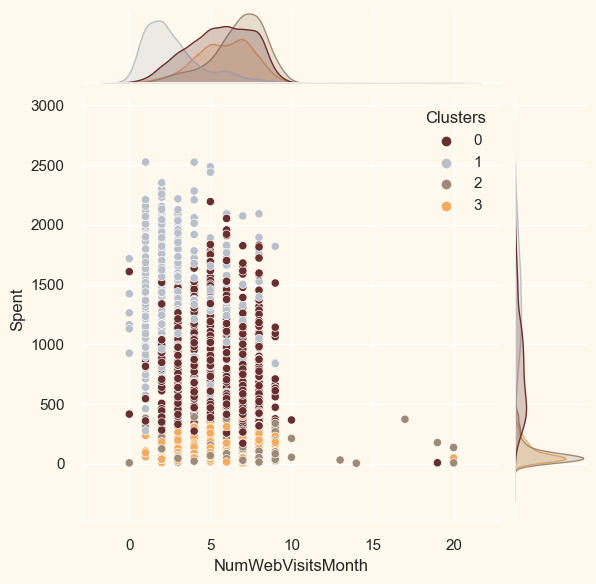

In [49]:
#for more details on the purchasing style 
Places =["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases",  "NumWebVisitsMonth"] 

for i in Places:
    plt.figure()
    sns.jointplot(x=df[i],y = df["Spent"],hue=df["Clusters"], palette= pal)
    plt.show()

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

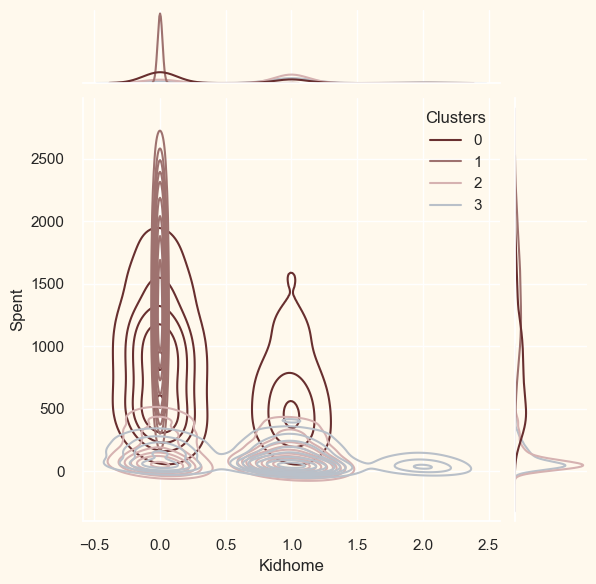

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

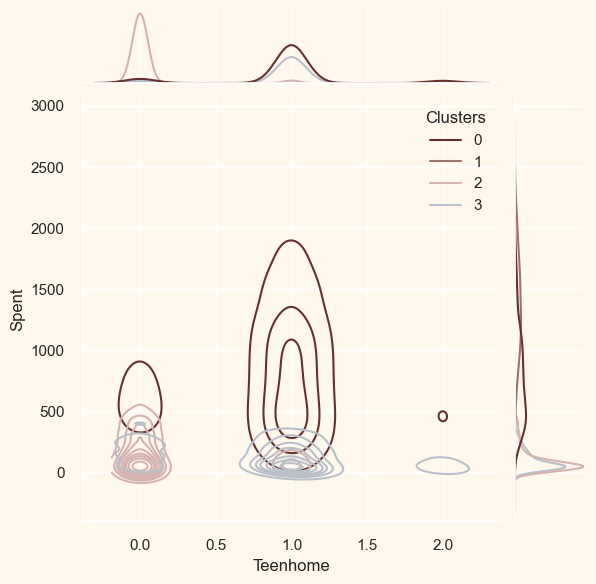

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

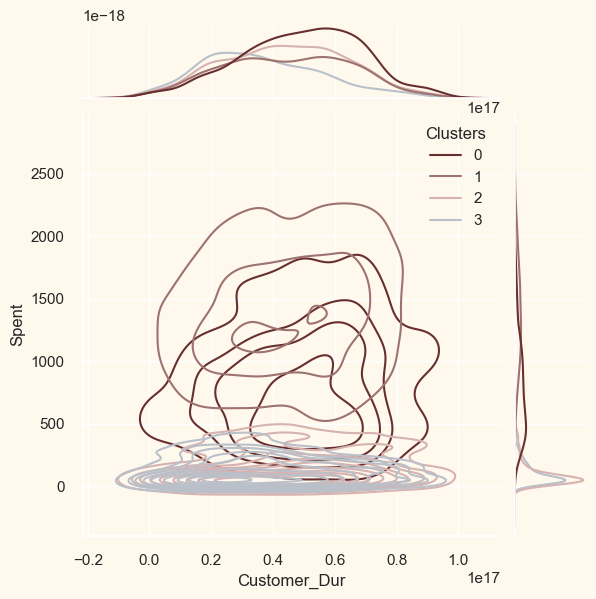

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

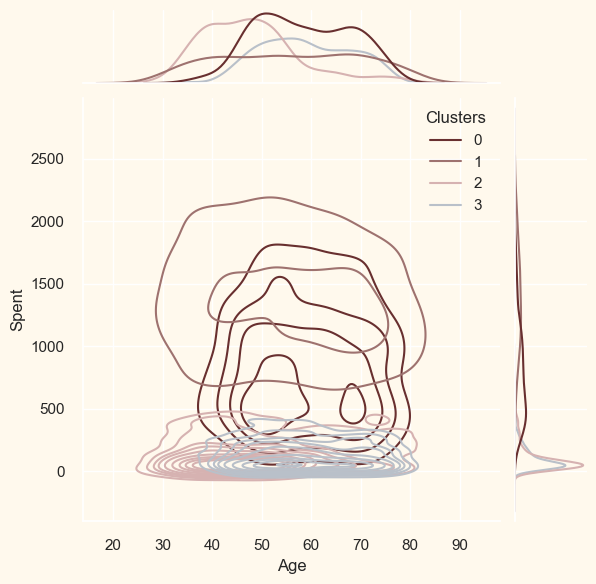

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

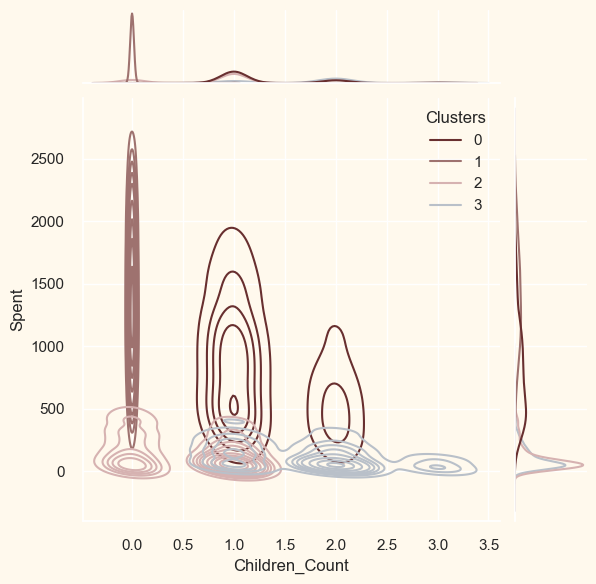

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

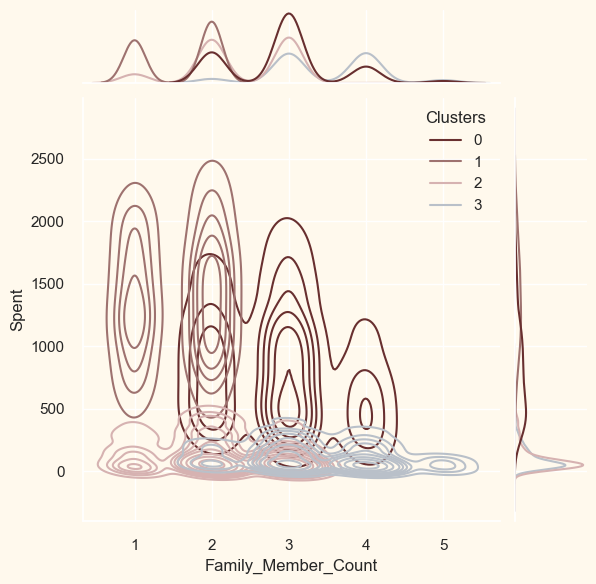

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

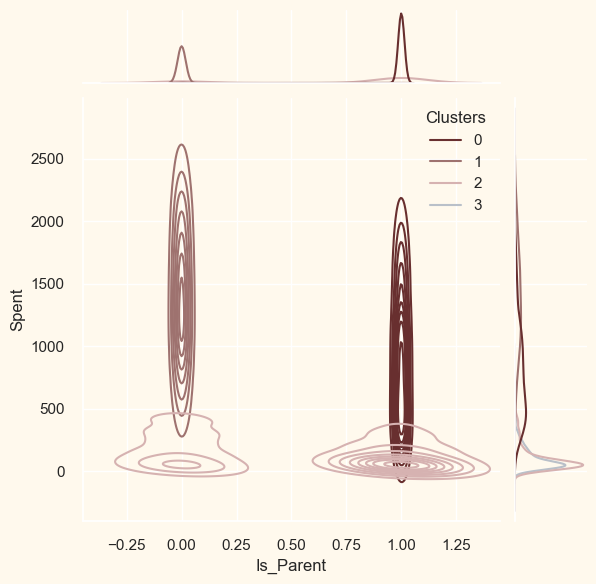

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

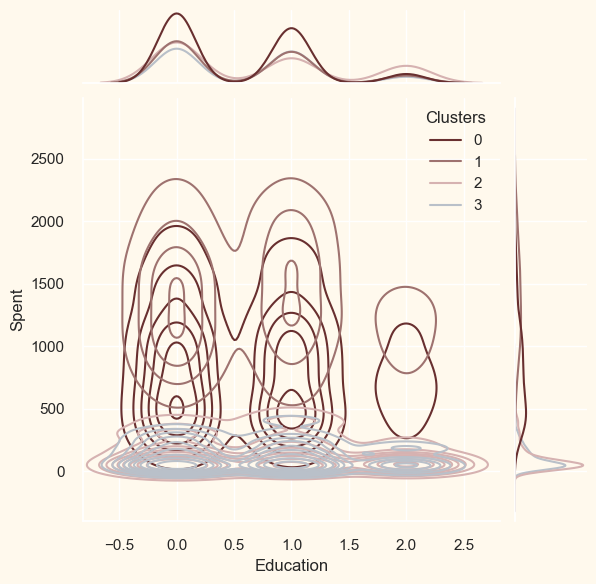

C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1826: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, y=self.y, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1877: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\Dell\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1883: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


<Figure size 800x550 with 0 Axes>

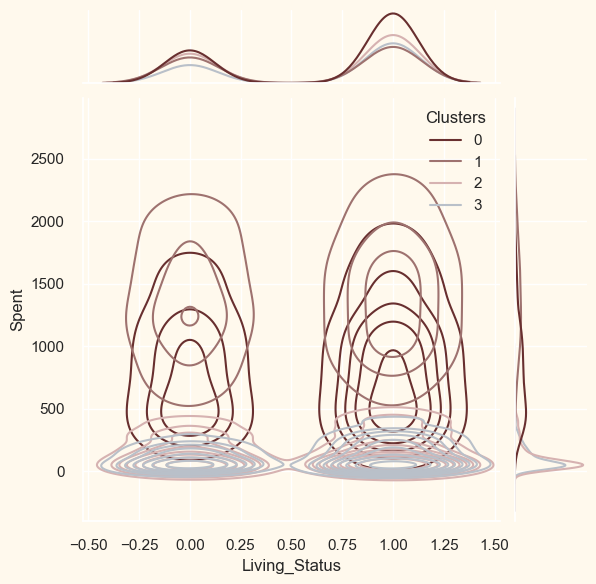

In [50]:
cmap = ["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"]
Personal = [ "Kidhome","Teenhome","Customer_Dur", "Age", "Children_Count", "Family_Member_Count", "Is_Parent", "Education","Living_Status"]
for i in Personal:
    plt.figure()
    sns.jointplot(x=df[i], y=df["Spent"], hue =df["Clusters"], kind="kde", palette=cmap)
    plt.show()

# Cluster Analysis  

<h>Cluster 0:
- Definitely a parent
- At max have 4 and at least 2 members in family
- Single parents are a subset of this group
- Most of them have a teenager at home
- They are relatively older

Cluster 1:
- Definitely not a parent
- At max there are only 2 members in the family
- A slight majority of couples over singles
- Span all ages
- A high income group

Cluster 2:
- The majority of these people are parents
- At the max there are 3 members in the family
- They majorly have one kid (and not teenagers, typically)
- They are relatively younger

Cluster 3:
- They are definitely a parent
- At max have 5 and at least 2 members in the family
- Majority have a teenager at home
- They are relatively older
-  A low-income group</h>

# Additional Information

# CLUSTER 0
<p>The customers belonging to the cluster 0, are definetly a parent.
 They have at max 4 children and at least 2 members in the family. 
 Most of them have a teenager at home. 
 They are relatively older , typically lie between age group of mid 30's and early late 70's. </p>

 # Cluster 1
 <p> Individuals lying in this cluster are not parents, at max there are only 2 members in the family. A slight majority of individuals lying in this cluster are couples while the rest are single. Broadly the individuals lying in this category span all age groups. The individuals lying in these category belong to high-income group.</p>

# Cluster 2
<p>Majority of them are parents, at max there 3 members in the family. At max there is only one kid and most of them don't have a teenager. They belong to low income group and they spent less while purchasing, and they are relatively younger.</p>

# General Analysis

Text(0.5, 1.0, 'Income Analysis')

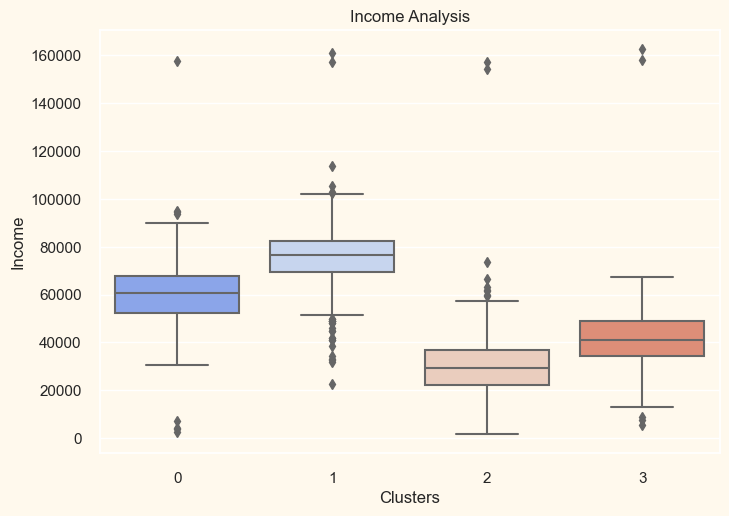

In [51]:
sns.boxplot(data=df,x='Clusters',y='Income',palette='coolwarm')
plt.title('Income Analysis')

Text(0.5, 1.0, 'Analysis to identify spent amount across each cluster')

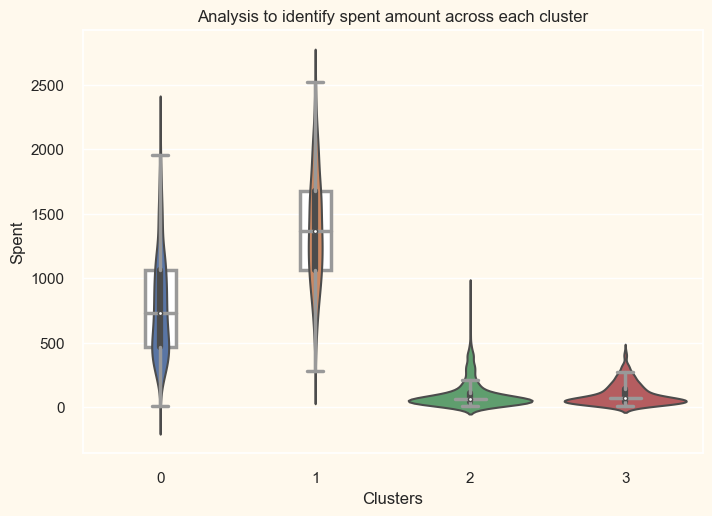

In [52]:
sns.violinplot(data=df,x='Clusters',y='Spent')
sns.boxplot(x='Clusters', y='Spent', data=df, width=0.2, linewidth=2.5, color='white', showfliers=False)
plt.title('Analysis to identify spent amount across each cluster')

#### FUTURE COURSE OF ACTION

# For Cluster 0:
for the given cluster they tend to spend

In [53]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'df' is a pandas dataFrame
median_income = df.loc[df['Clusters'] ==0,'Income'].median()
min_income = df.loc[df['Clusters'] ==0,'Income'].min()
mean_income = df.loc[df['Clusters']==0,'Income'].mean()
max_income = df.loc[df['Clusters']==0,'Income'].max()
mode_income = st.mode(df.loc[df['Clusters']==0,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

60474.0
2447.0
60052.556497175145
157243.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\2884933947.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_income = st.mode(df.loc[df['Clusters']==0,'Income'])


In [54]:
pip show scipy

Name: scipyNote: you may need to restart the kernel to use updated packages.

Version: 1.10.1
Summary: Fundamental algorithms for scientific computing in Python
Home-page: https://scipy.org/
Author: 
Author-email: 
License: Copyright (c) 2001-2002 Enthought, Inc. 2003-2022, SciPy Developers.
All rights reserved.

Redistribution and use in source and binary forms, with or without
modification, are permitted provided that the following conditions
are met:

1. Redistributions of source code must retain the above copyright
   notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above
   copyright notice, this list of conditions and the following
   disclaimer in the documentation and/or other materials provided
   with the distribution.

3. Neither the name of the copyright holder nor the names of its
   contributors may be used to endorse or promote products derived
   from this software without specific prior written permissi

# Income Analysis For Cluster 0

In [55]:
mask = (df['Clusters']==0)
check = df.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 52379.25
Upper Quartile: 67760.25
Lower whisker value: 25518.5
Upper whisker value: 134171.5


# Amount Spent Analysis

In [56]:
import scipy
from scipy import stats as st
spent_usually = df.loc[df['Clusters']==1,'Spent'].value_counts()
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(df.loc[df['Clusters']==1, 'Spent']))
print('The mean value of spent amount',np.mean(df.loc[df['Clusters']==1,'Spent']))
print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==1,'Spent']))

Maximum Occuring frequency for various spent amounts: 4
the maximum value with maximum frequency: 2525
the minimum value with maximum frequency: 277
The median value of spent amount 1364.0
The mean value of spent amount 1385.0164271047229
The mode value of spent amount ModeResult(mode=array([1033], dtype=int64), count=array([4]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\3668050891.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==1,'Spent']))


# Customer Recency Analysis

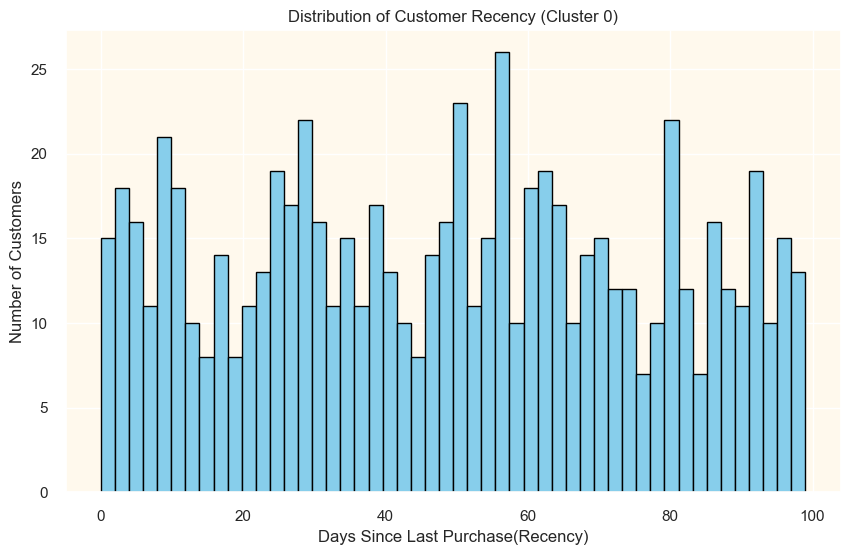

In [57]:
# sns.barplot(x=df['Recency'],hue=df['Clusters'])
import matplotlib.pyplot as plt
mask = df[df['Clusters']==0 & df['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 0)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

The histogram shows that the greatest number of customers in Cluster 0 made a purchase between 0 and 20 days ago.  There is a general downward trend as the days since purchase increases. This means that there are fewer and fewer customers who made a purchase the further out you go on the x-axis.

In other words, recency in Cluster 0 is right-skewed. This means that most customers in the cluster have purchased recently (within 0-20 days).

#### FUTURE COURSE OF ACTION

# For Cluster 1:
for the given cluster they tend to spend

In [58]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'df' is a pandas dfFrame
median_income = df.loc[df['Clusters'] ==1,'Income'].median()
min_income = df.loc[df['Clusters'] ==1,'Income'].min()
mean_income = df.loc[df['Clusters']==1,'Income'].mean()
max_income = df.loc[df['Clusters']==1,'Income'].max()
mode_income = st.mode(df.loc[df['Clusters']==1,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

76542.0
22507.0
75714.74332648871
160803.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\1552725662.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_income = st.mode(df.loc[df['Clusters']==1,'Income'])


In [59]:
mask = (df['Clusters']==1)
check = df.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 69498.0
Upper Quartile: 82500.5
Lower whisker value: 42010.75
Upper whisker value: 141299.25


# Amount Spent Analysis

In [60]:
import scipy
from scipy import stats as st
spent_usually = df.loc[df['Clusters']==1,'Spent'].value_counts()
print(spent_usually)
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(df.loc[df['Clusters']==1, 'Spent']))
print('The mean value of spent amount',np.mean(df.loc[df['Clusters']==1,'Spent']))
print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==1,'Spent']))

Spent
1033    4
1149    4
1366    4
1574    4
981     3
       ..
2018    1
1226    1
421     1
1345    1
1241    1
Name: count, Length: 388, dtype: int64
Maximum Occuring frequency for various spent amounts: 4
the maximum value with maximum frequency: 2525
the minimum value with maximum frequency: 277
The median value of spent amount 1364.0
The mean value of spent amount 1385.0164271047229
The mode value of spent amount ModeResult(mode=array([1033], dtype=int64), count=array([4]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\1883118589.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==1,'Spent']))


In [61]:
A = df.loc[df['Clusters']==1,'Spent']
Q1 =  A.quantile(0.25)
Q2 =  A.quantile(0.75)
print('Lower Quartile value:',Q1, end = '\n')
print('Upper Quartile Value :', Q2)
IQR = Q2 - Q1
print("Interquartile Range (IQR):", IQR)

Lower Quartile value: 1062.0
Upper Quartile Value : 1676.5
Interquartile Range (IQR): 614.5


# Income vs Spent Analysis

In [62]:
mask = (df['Clusters'] == 1) & (df['Income'] <= 82500.5) & (df['Income'] >= 69498)
spent_mask = (df['Clusters']==1) & (df['Spent']>=1062) & (df['Spent'] <= 1676.5 )
# sns.histplot(df=df,x=df['mask'],y=df['spent_mask'])

filtered_df = df[mask  & spent_mask]

# # Calculate Spent as a percentage of Income on filtered df
filtered_df['Spent_as_pct_of_Income'] = (filtered_df['Spent'] / filtered_df['Income']) * 100
print('On Average they tend to spend about 1.78 percent of their income:',np.mean(filtered_df['Spent_as_pct_of_Income']))




On Average they tend to spend about 1.78 percent of their income: 1.7846462806672678


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\999194743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Spent_as_pct_of_Income'] = (filtered_df['Spent'] / filtered_df['Income']) * 100


# Customer Recency Analysis

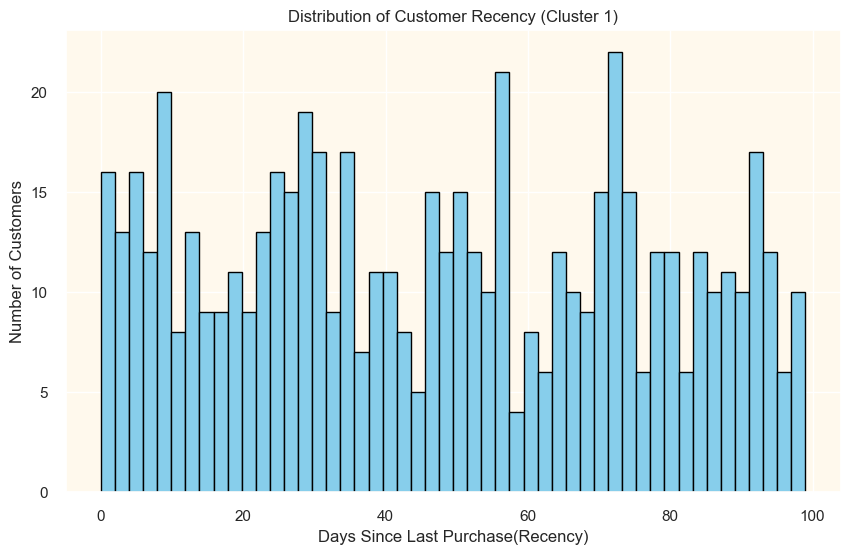

In [63]:
# sns.barplot(x=df['Recency'],hue=df['Clusters'])
import matplotlib.pyplot as plt
mask = df[df['Clusters']==1 & df['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 1)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

The graph shows a distribution of the number of days since the last purchase (recency) for customers in cluster 1. The x-axis represents the number of days since the last purchase, and the y-axis represents the number of customers in each bin. By looking at the graph, you can see how many customers in cluster 1 made a purchase in the last 0-30 days, 31-60 days, and so on. The shape of the distribution can tell you things about the recency behavior of customers in cluster 1. For example, a graph with a peak at the beginning (lower recency values) suggests that most customers in cluster 1 tend to make repeat purchases soon after their initial purchase.

#### FUTURE COURSE OF ACTION

# For Cluster 2:
for the given cluster they tend to spend

# Income Analysis for Cluster 2

In [64]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'df' is a pandas dfFrame
median_income = df.loc[df['Clusters'] ==2,'Income'].median()
min_income = df.loc[df['Clusters'] ==2,'Income'].min()
mean_income = df.loc[df['Clusters']==2,'Income'].mean()
max_income = df.loc[df['Clusters']==2,'Income'].max()
mode_income = st.mode(df.loc[df['Clusters']==2,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

29211.5
1730.0
29956.56551724138
156924.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\3447970175.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_income = st.mode(df.loc[df['Clusters']==2,'Income'])


In [65]:
mask = (df['Clusters']==2)
check = df.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 22374.25
Upper Quartile: 36692.5
Lower whisker value: 23207.375
Upper whisker value: 135446.625


#### From above given Income Analysis chart and above mentioned analysis, we can say that majority of customers lying in cluster 2 have an income ranging from 22374 to 36692.5

# Amount Spent Analysis

In [66]:
import scipy
from scipy import stats as st
spent_usually = df.loc[df['Clusters']==2,'Spent'].value_counts()
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(df.loc[df['Clusters']==2, 'Spent']))
print('The mean value of spent amount',np.mean(df.loc[df['Clusters']==2,'Spent']))
print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==2,'Spent']))

Maximum Occuring frequency for various spent amounts: 13
the maximum value with maximum frequency: 928
the minimum value with maximum frequency: 5
The median value of spent amount 61.0
The mean value of spent amount 98.98103448275862
The mode value of spent amount ModeResult(mode=array([46], dtype=int64), count=array([13]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\1326004789.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==2,'Spent']))


In [67]:
A = df.loc[df['Clusters']==2,'Spent']
Q1 =  A.quantile(0.25)
Q2 =  A.quantile(0.75)
print('Lower Quartile value:',Q1, end = '\n')
print('Upper Quartile Value :', Q2)
IQR = Q2 - Q1
print("Interquartile Range (IQR):", IQR)

Lower Quartile value: 36.0
Upper Quartile Value : 107.5
Interquartile Range (IQR): 71.5


#### Hence from the above given graph and previous calculations we can make an inference that members of cluster 2 tend to spend around 36 and above to the range 107.5, with mean spent value being 98.98 and median spent value being 61

# Income vs Spent Analysis

In [68]:
mask = (df['Clusters'] == 2) & (df['Income'] <= 36692.5 ) & (df['Income'] >= 22374.25)
spent_mask = (df['Clusters']==2) & (df['Spent']>=36) & (df['Spent'] <= 107.5 )
# sns.histplot(df=df,x=df['mask'],y=df['spent_mask']) 

filtered_df = df[mask  & spent_mask]

# # Calculate Spent as a percentage of Income on filtered df
filtered_df['Spent_as_pct_of_Income'] = (filtered_df['Spent'] / filtered_df['Income']) * 100
print('On Average they tend to spend about this percent of their income:',np.mean(filtered_df['Spent_as_pct_of_Income']))




On Average they tend to spend about this percent of their income: 0.2178067188432807


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\939489977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Spent_as_pct_of_Income'] = (filtered_df['Spent'] / filtered_df['Income']) * 100


# Customer Recency Analysis

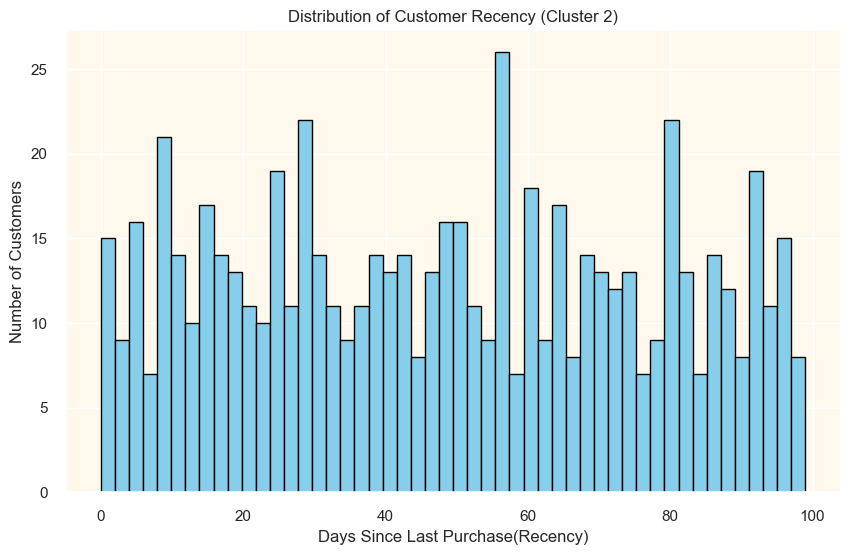

In [69]:
# sns.barplot(x=df['Recency'],hue=df['Clusters'])
import matplotlib.pyplot as plt
mask = df[df['Clusters']==2 & df['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 2)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

Distribution: The y-axis shows the number of customers, and the x-axis shows the number of days since their last purchase (recency). The higher the bar in the graph, the more customers in cluster 2 fall within that range of recency.

Recency Pattern: The graph seems to show that a higher number of customers in cluster 2 tend to have made a purchase between 0 and 20 days ago. This indicates a tendency towards frequent purchases. There's a gradual decline in the number of customers as we move towards higher recency values (days since last purchase), suggesting a decrease in purchase frequency over time.

#### FUTURE COURSE OF ACTION

# For Cluster 3:
for the given cluster they tend to spend

# Income Analysis for Cluster 3

In [70]:
import pandas as pd
import scipy 
from scipy import stats as st
# Assuming 'df' is a pandas dfFrame
median_income = df.loc[df['Clusters'] ==3,'Income'].median()
min_income = df.loc[df['Clusters'] ==3,'Income'].min()
mean_income = df.loc[df['Clusters']==3,'Income'].mean()
max_income = df.loc[df['Clusters']==3,'Income'].max()
mode_income = st.mode(df.loc[df['Clusters']==3,'Income'])
print(median_income)
print(min_income)
print(mean_income)
print(max_income)

41120.0
5648.0
41573.89244851258
162397.0


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\1682495030.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_income = st.mode(df.loc[df['Clusters']==3,'Income'])


In [71]:
mask = (df['Clusters']==3)
check = df.loc[mask,'Income']
Q1=check.quantile(0.25)
Q2=check.quantile(0.75)
print('Lower Quartile', Q1)
print('Upper Quartile:',Q2)
IQR = Q1-Q2
lw =  check.min() - 1.5 * IQR
up =  check.max() +  1.5 * IQR
print('Lower whisker value:', lw)
print('Upper whisker value:', up)

Lower Quartile 34213.0
Upper Quartile: 48920.0
Lower whisker value: 27708.5
Upper whisker value: 140336.5


#### From above given Income Analysis chart and above mentioned analysis, we can say that majority of customers lying in cluster 2 have an income ranging from 22374 to 36692.5

# Amount Spent Analysis

In [72]:
import scipy
from scipy import stats as st
spent_usually = df.loc[df['Clusters']==2,'Spent'].value_counts()
print('Maximum Occuring frequency for various spent amounts:',max(spent_usually))
print('the maximum value with maximum frequency:',max(spent_usually.index))
print('the minimum value with maximum frequency:',min(spent_usually.index))
print('The median value of spent amount',np.median(df.loc[df['Clusters']==3, 'Spent']))
print('The mean value of spent amount',np.mean(df.loc[df['Clusters']==3,'Spent']))
print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==3,'Spent']))

Maximum Occuring frequency for various spent amounts: 13
the maximum value with maximum frequency: 928
the minimum value with maximum frequency: 5
The median value of spent amount 67.0
The mean value of spent amount 99.59725400457666
The mode value of spent amount ModeResult(mode=array([22], dtype=int64), count=array([9]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\143044555.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  print('The mode value of spent amount',st.mode(df.loc[df['Clusters']==3,'Spent']))


In [73]:
A = df.loc[df['Clusters']==3,'Spent']
Q1 =  A.quantile(0.25)
Q2 =  A.quantile(0.75)
print('Lower Quartile value:',Q1, end = '\n')
print('Upper Quartile Value :', Q2)
IQR = Q2 - Q1
print("Interquartile Range (IQR):", IQR)

Lower Quartile value: 41.0
Upper Quartile Value : 140.0
Interquartile Range (IQR): 99.0


#### Hence from the above given graph and previous calculations we can make an inference that members of cluster 2 tend to spend around 41 and above to the range of 140, with mean spent value being 99.6 and median spent value being 67

# Income vs Spent Analysis

In [74]:
mask = (df['Clusters'] == 3) & (df['Income'] <= 48920.0 ) & (df['Income'] >= 34213.0)
spent_mask = (df['Clusters']==3) & (df['Spent']>=41) & (df['Spent'] <= 140 )
# sns.histplot(df=df,x=df['mask'],y=df['spent_mask']) 

filtered_df = df[mask  & spent_mask]

# # Calculate Spent as a percentage of Income on filtered df
filtered_df['Spent_as_pct_of_Income'] = (filtered_df['Spent'] / filtered_df['Income']) * 100
print('On Average they tend to spend about this percent of their income:',np.mean(filtered_df['Spent_as_pct_of_Income']))




On Average they tend to spend about this percent of their income: 0.1852264145296519


C:\Users\Dell\AppData\Local\Temp\ipykernel_15468\2006941745.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Spent_as_pct_of_Income'] = (filtered_df['Spent'] / filtered_df['Income']) * 100


# Customer Recency Analysis

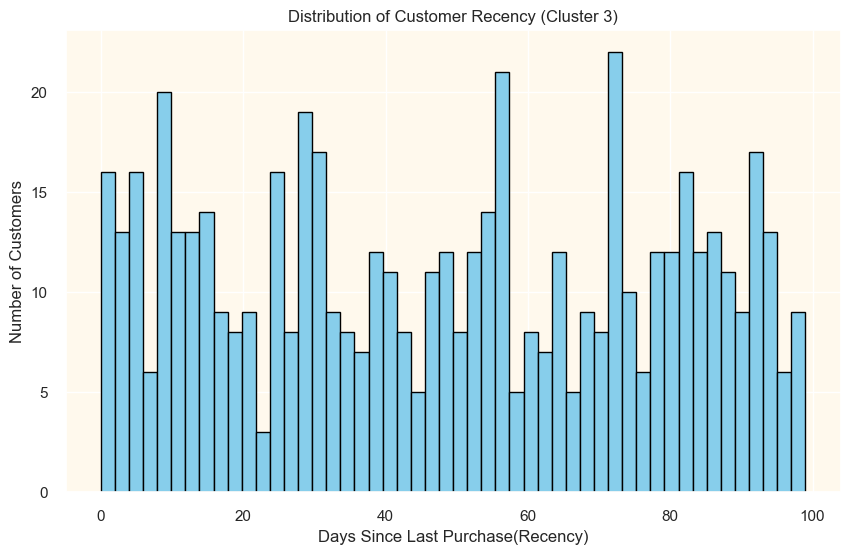

In [75]:
# sns.barplot(x=df['Recency'],hue=df['Clusters'])
import matplotlib.pyplot as plt
mask = df[df['Clusters']==3 & df['Recency']]
plt.figure(figsize=(10, 6), facecolor='white')
plt.hist(mask['Recency'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Recency (Cluster 3)')
plt.xlabel('Days Since Last Purchase(Recency)')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()

Distribution: The y-axis shows the number of customers, and the x-axis shows the number of days since their last purchase (recency). The higher the bar in the graph, the more customers in cluster 2 fall within that range of recency.

Recency Pattern: The graph seems to show that a higher number of customers in cluster 2 tend to have made a purchase between 0 and 20 days ago. This indicates a tendency towards frequent purchases. There's a gradual decline in the number of customers as we move towards higher recency values (days since last purchase), suggesting a decrease in purchase frequency over time.

# Overall Cluster Purchase Analysis

<Axes: xlabel='Clusters', ylabel='Wines'>

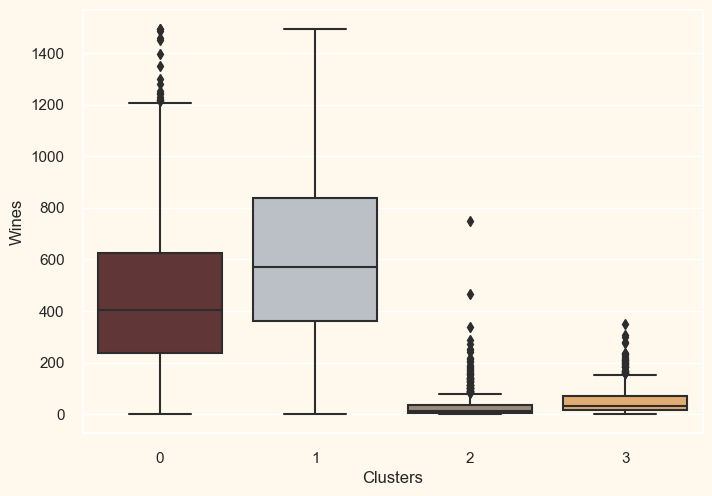

In [76]:
sns.boxplot(data = df ,x='Clusters',y='Wines',palette= pal)

#### from the above plot we can understand that majority of users in Cluster 0 are 

<Axes: xlabel='Clusters', ylabel='Gold'>

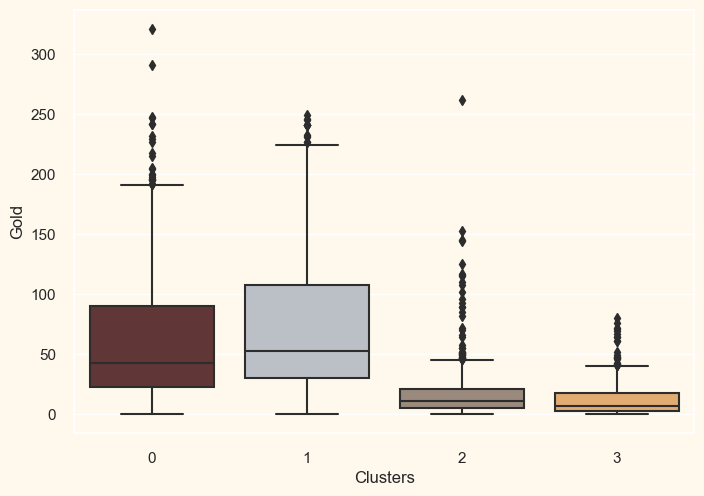

In [77]:
sns.boxplot(data = df ,x='Clusters',y='Gold',palette= pal)

<Axes: xlabel='Clusters', ylabel='Fish'>

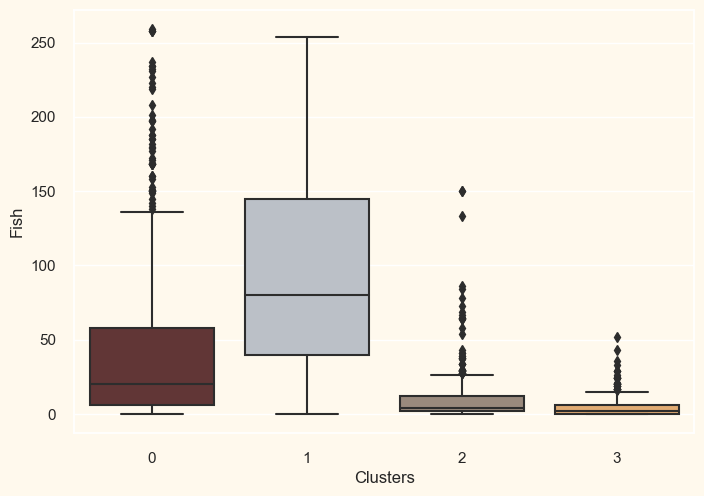

In [78]:
sns.boxplot(data = df ,x='Clusters',y='Fish',palette= pal)

<Axes: xlabel='Clusters', ylabel='Meat'>

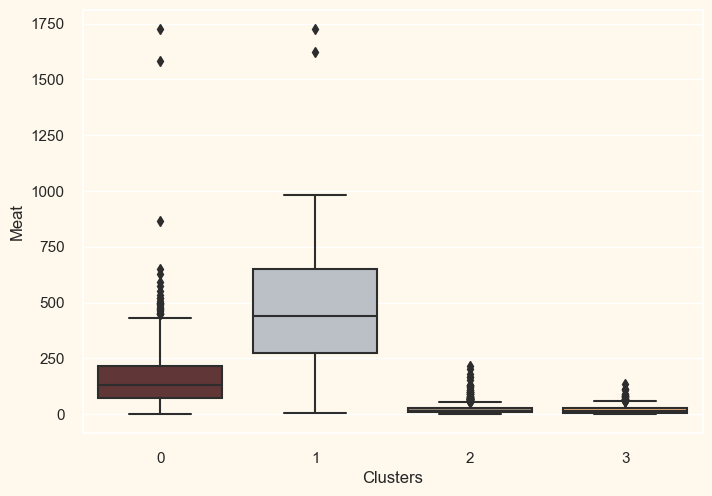

In [79]:
sns.boxplot(data = df ,x='Clusters',y='Meat',palette= pal)

<Axes: xlabel='Clusters', ylabel='Sweets'>

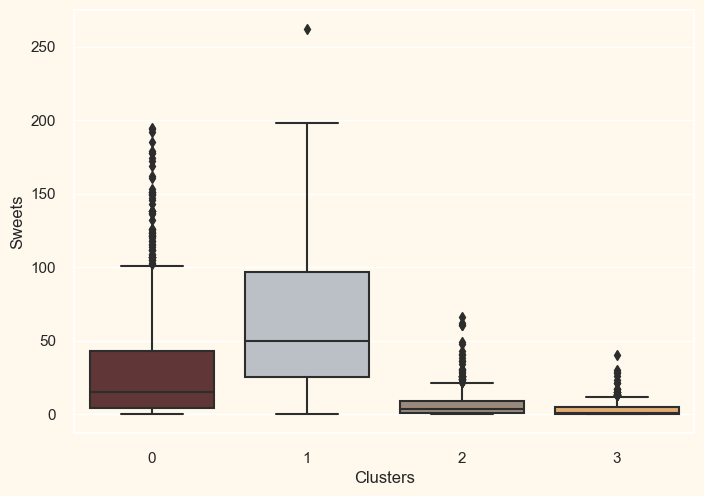

In [80]:
sns.boxplot(data = df ,x='Clusters',y='Sweets',palette= pal)

# Medium of Purchase Analysis

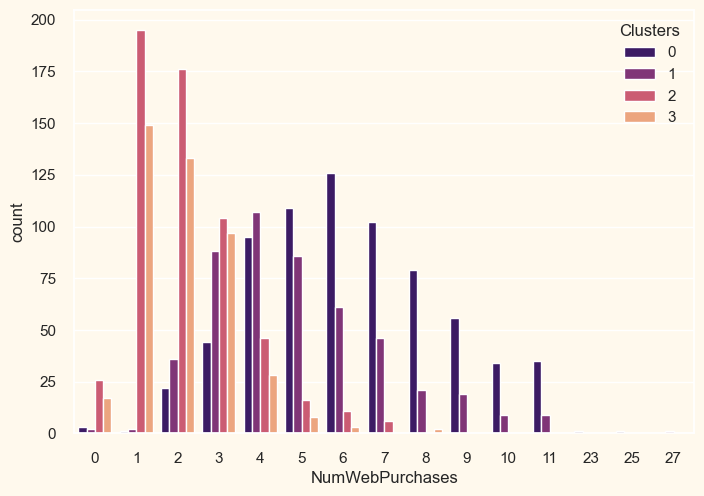

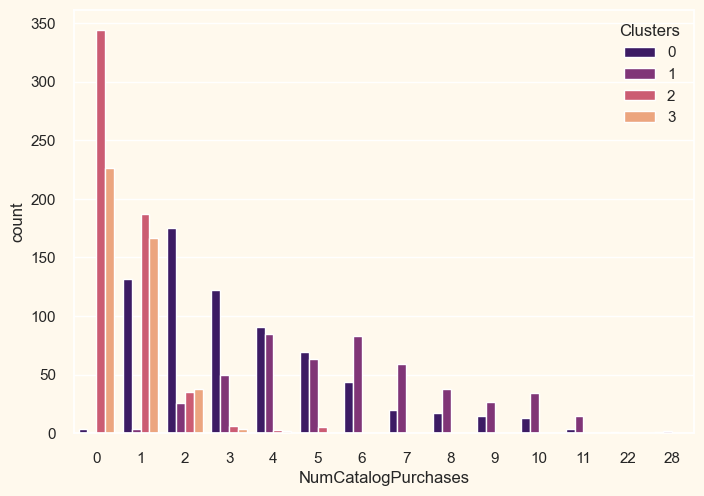

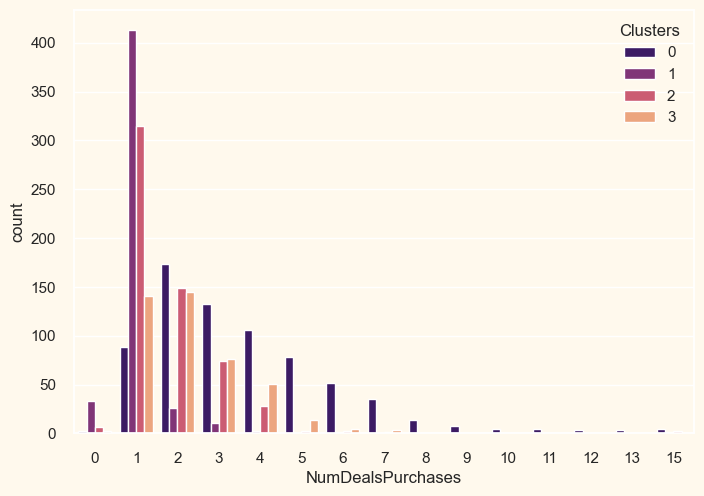

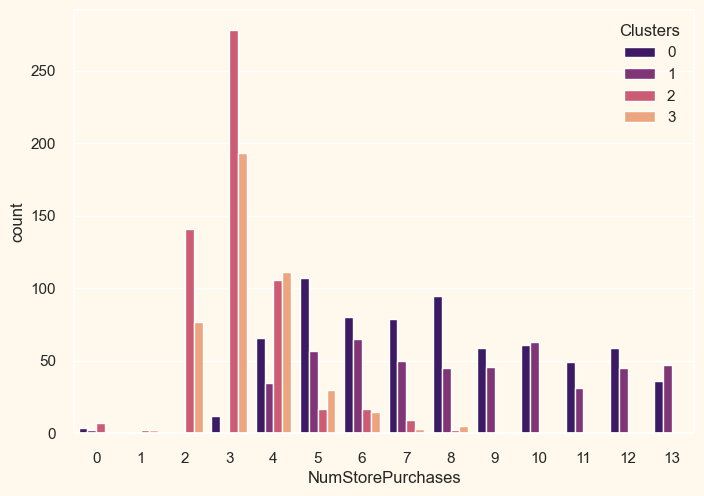

In [81]:

sns.countplot(x=df['NumWebPurchases'], hue = df['Clusters'], palette='magma')
plt.show()
sns.countplot(x=df['NumCatalogPurchases'], hue = df['Clusters'], palette='magma')
plt.show()
sns.countplot(x=df['NumDealsPurchases'], hue = df['Clusters'], palette='magma')
plt.show()
sns.countplot(x=df['NumStorePurchases'], hue = df['Clusters'], palette='magma')
plt.show()

<Axes: xlabel='NumDealsPurchases', ylabel='count'>

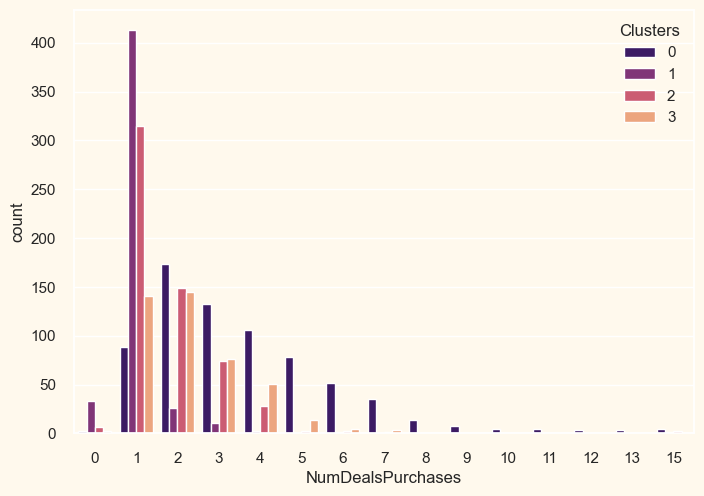

In [82]:

sns.countplot(x=df['NumDealsPurchases'], hue = df['Clusters'], palette='magma')

<Axes: xlabel='NumStorePurchases', ylabel='count'>

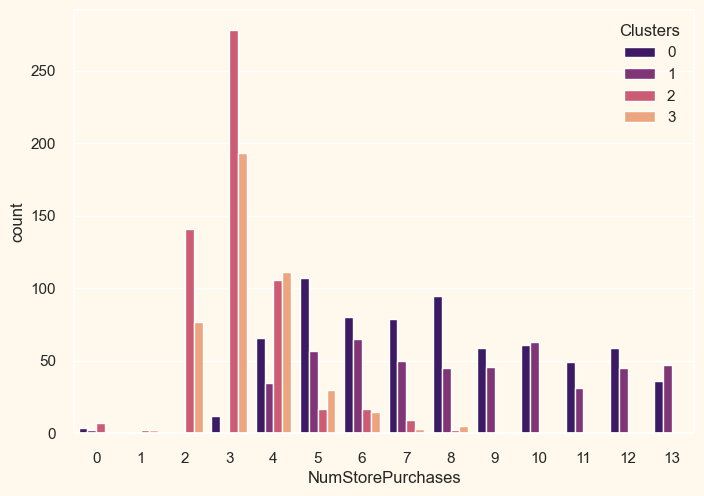

In [83]:
sns.countplot(x=df['NumStorePurchases'], hue = df['Clusters'], palette='magma')

<Axes: xlabel='NumCatalogPurchases', ylabel='count'>

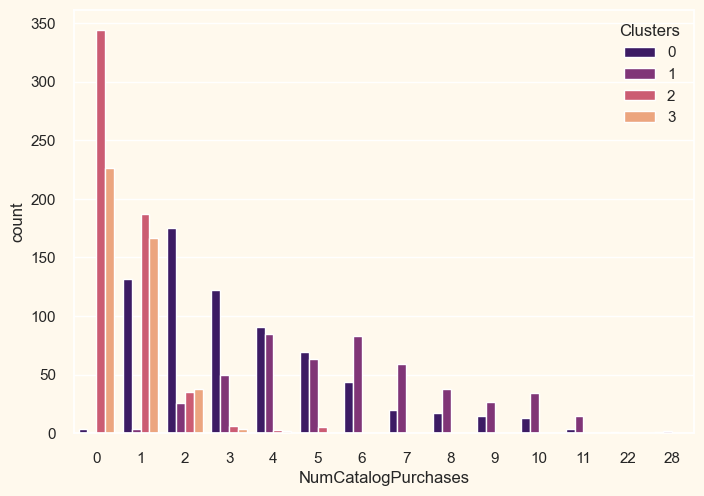

In [84]:
sns.countplot(x=df['NumCatalogPurchases'], hue = df['Clusters'], palette='magma')

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
cluster_purchases = df.groupby('Clusters')[['NumWebPurchases', 'NumStorePurchases', 'NumDealsPurchases', 'NumCatalogPurchases']].sum()
print(cluster_purchases)

          NumWebPurchases  NumStorePurchases  NumDealsPurchases  \
Clusters                                                          
0                    4481               5485               2625   
1                    2439               4062                527   
2                    1231               1817               1006   
3                     892               1480                984   

          NumCatalogPurchases  
Clusters                       
0                        2456  
1                        2880  
2                         312  
3                         263  


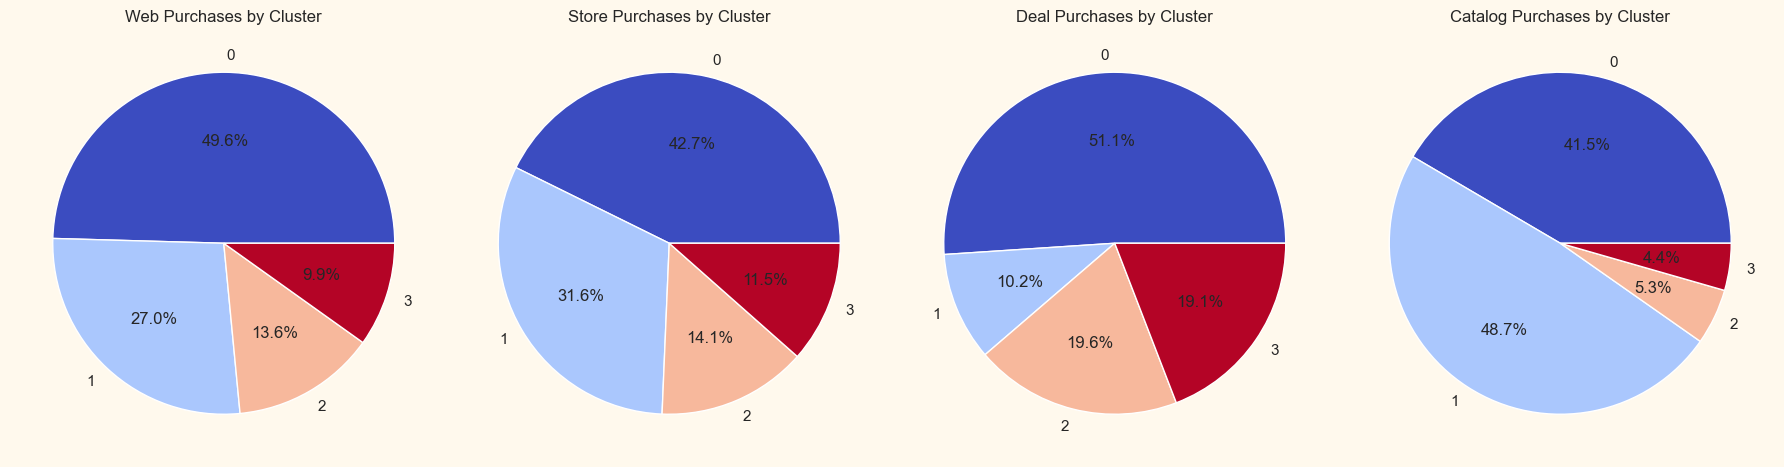

In [86]:
colors = plt.cm.coolwarm(np.linspace(0, 1, len(cluster_purchases.index)))

fig, axes = plt.subplots(1, 4, figsize=(18, 6))

axes[0].pie(cluster_purchases['NumWebPurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[0].set_title('Web Purchases by Cluster')

axes[1].pie(cluster_purchases['NumStorePurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[1].set_title('Store Purchases by Cluster')

axes[2].pie(cluster_purchases['NumDealsPurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[2].set_title('Deal Purchases by Cluster')

axes[3].pie(cluster_purchases['NumCatalogPurchases'], labels=cluster_purchases.index, colors=colors, autopct='%1.1f%%')
axes[3].set_title('Catalog Purchases by Cluster')

plt.tight_layout()
plt.show()
